In [1]:
# Lopez-Romero, Alvaro 
# Navarro, Aaron Christian
# COMP 542 Section # 17019
# Project Initial Data Presendation and Visualization
# Binary Classification for song/music recommendation prediction  
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# root path for all data files should exist where this notebook is
data_path = "./Datasets"
# target of 1 means that there are recurring listening event(s) trigerred within a month after the user's 
# very first observable listening event. targer of 0 otherwise

# specific data set paths 
train_csv_path = os.path.join(data_path,"train.csv")
test_csv_path = os.path.join(data_path,"test.csv")
songs_csv_path = os.path.join(data_path,"songs.csv")
members_csv_path = os.path.join(data_path,"members.csv")
song_extra_info_csv_path = os.path.join(data_path,"song_extra_info.csv")

# read all datasets into dataframes
train_set = pd.read_csv(train_csv_path)
test_set = pd.read_csv(test_csv_path)
songs_set = pd.read_csv(songs_csv_path)
members_set = pd.read_csv(members_csv_path)
song_extrainfo_set = pd.read_csv(song_extra_info_csv_path)

In [2]:
# shapes and features of each data set 
print('Shape of train dataset is: ', train_set.shape)
print('Shape of test dataset is: ', test_set.shape)
print('Shape of songs dataset is: ', songs_set.shape)
print('Shape of members dataset: ', members_set.shape)
print('Shape of song extra info dataset: ', song_extrainfo_set.shape)

Shape of train dataset is:  (7377418, 6)
Shape of test dataset is:  (2556790, 6)
Shape of songs dataset is:  (2296320, 7)
Shape of members dataset:  (34403, 7)
Shape of song extra info dataset:  (2295971, 3)


In [3]:
print('Features of train dataset: ', train_set.columns)
print('Features of test dataset:', test_set.columns)
print('Features of songs dataset: ', songs_set.columns)
print('Features of members dataset: ', members_set.columns)
print('Features of song_extra_info dataset : ', song_extrainfo_set.columns)

Features of train dataset:  Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target'],
      dtype='object')
Features of test dataset: Index(['id', 'msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type'],
      dtype='object')
Features of songs dataset:  Index(['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language'],
      dtype='object')
Features of members dataset:  Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date'],
      dtype='object')
Features of song_extra_info dataset :  Index(['song_id', 'name', 'isrc'], dtype='object')


In [4]:
# Feature analysis with respect to the target
# training set feature analysis
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   msno                object
 1   song_id             object
 2   source_system_tab   object
 3   source_screen_name  object
 4   source_type         object
 5   target              int64 
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


In [5]:
train_set.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [6]:
# helper function to plot histograms with respect to argument type (category/target)
def count_plot(data, x, hue, type):
  plt.figure(figsize=(18,15))
  sns.set(font_scale=2)
  sns.countplot(x=x, hue=hue, data=data)
  plt.xlabel(x,fontsize=30)
  plt.ylabel('count',fontsize=30)
  plt.xticks(rotation='90')
  plt.title('Count plot for {0} in {1} data'.format(x, type),fontsize=30)
  plt.tight_layout()

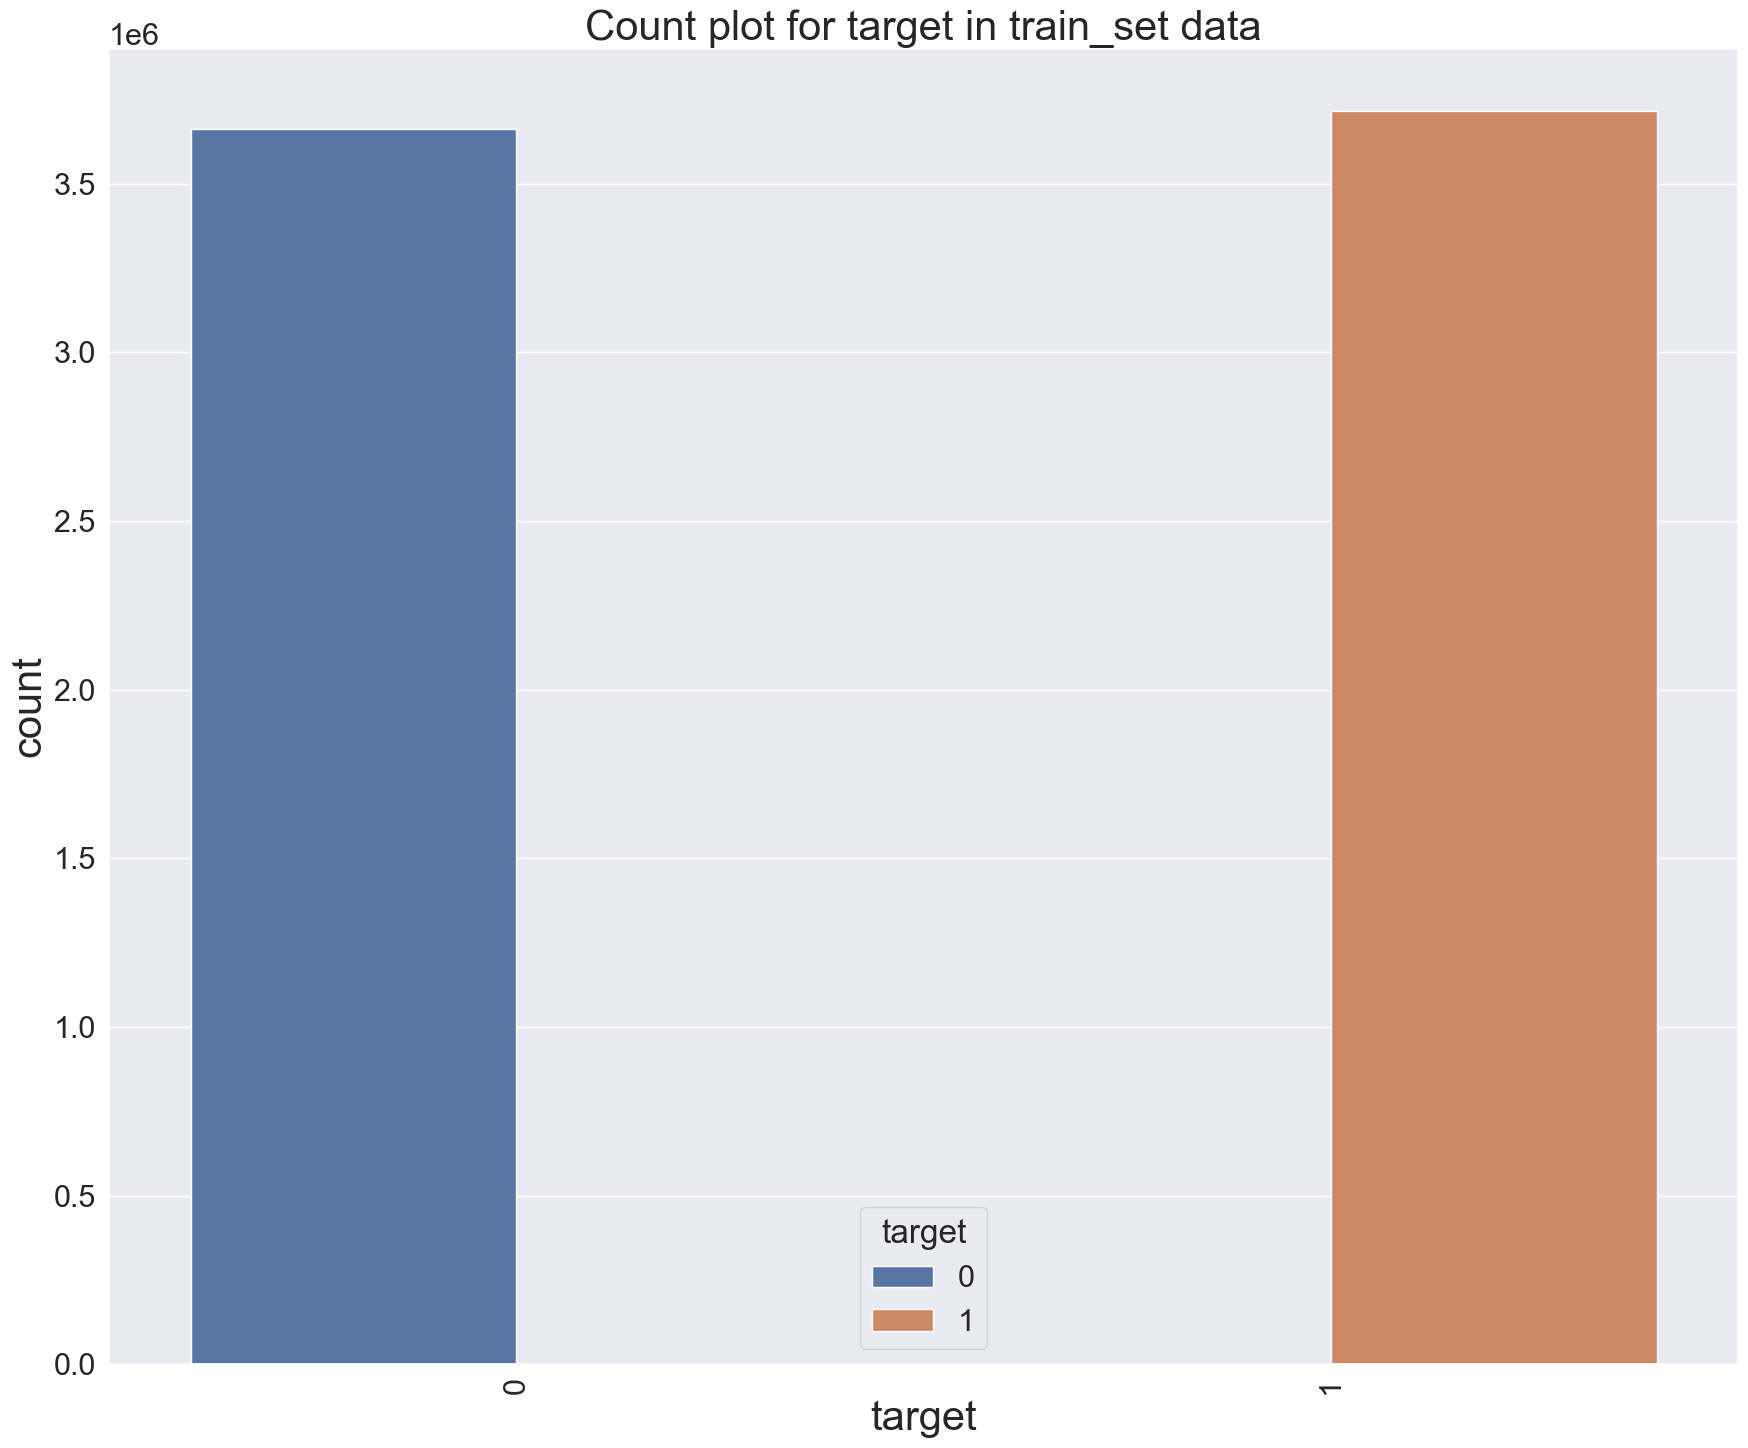

In [7]:
# countplot of our target in our training data
count_plot(train_set,'target','target','train_set')

In [8]:
# percentages with respect to total dataset of each target
print('Target 1 : {:.4f}%'.format(train_set['target'].value_counts()[0]/train_set.shape[0] * 100))
print('Target 0 : {:.4f}%'.format(train_set['target'].value_counts()[1]/train_set.shape[0] * 100))
print('Target Data is balanced')

Target 1 : 49.6483%
Target 0 : 50.3517%
Target Data is balanced


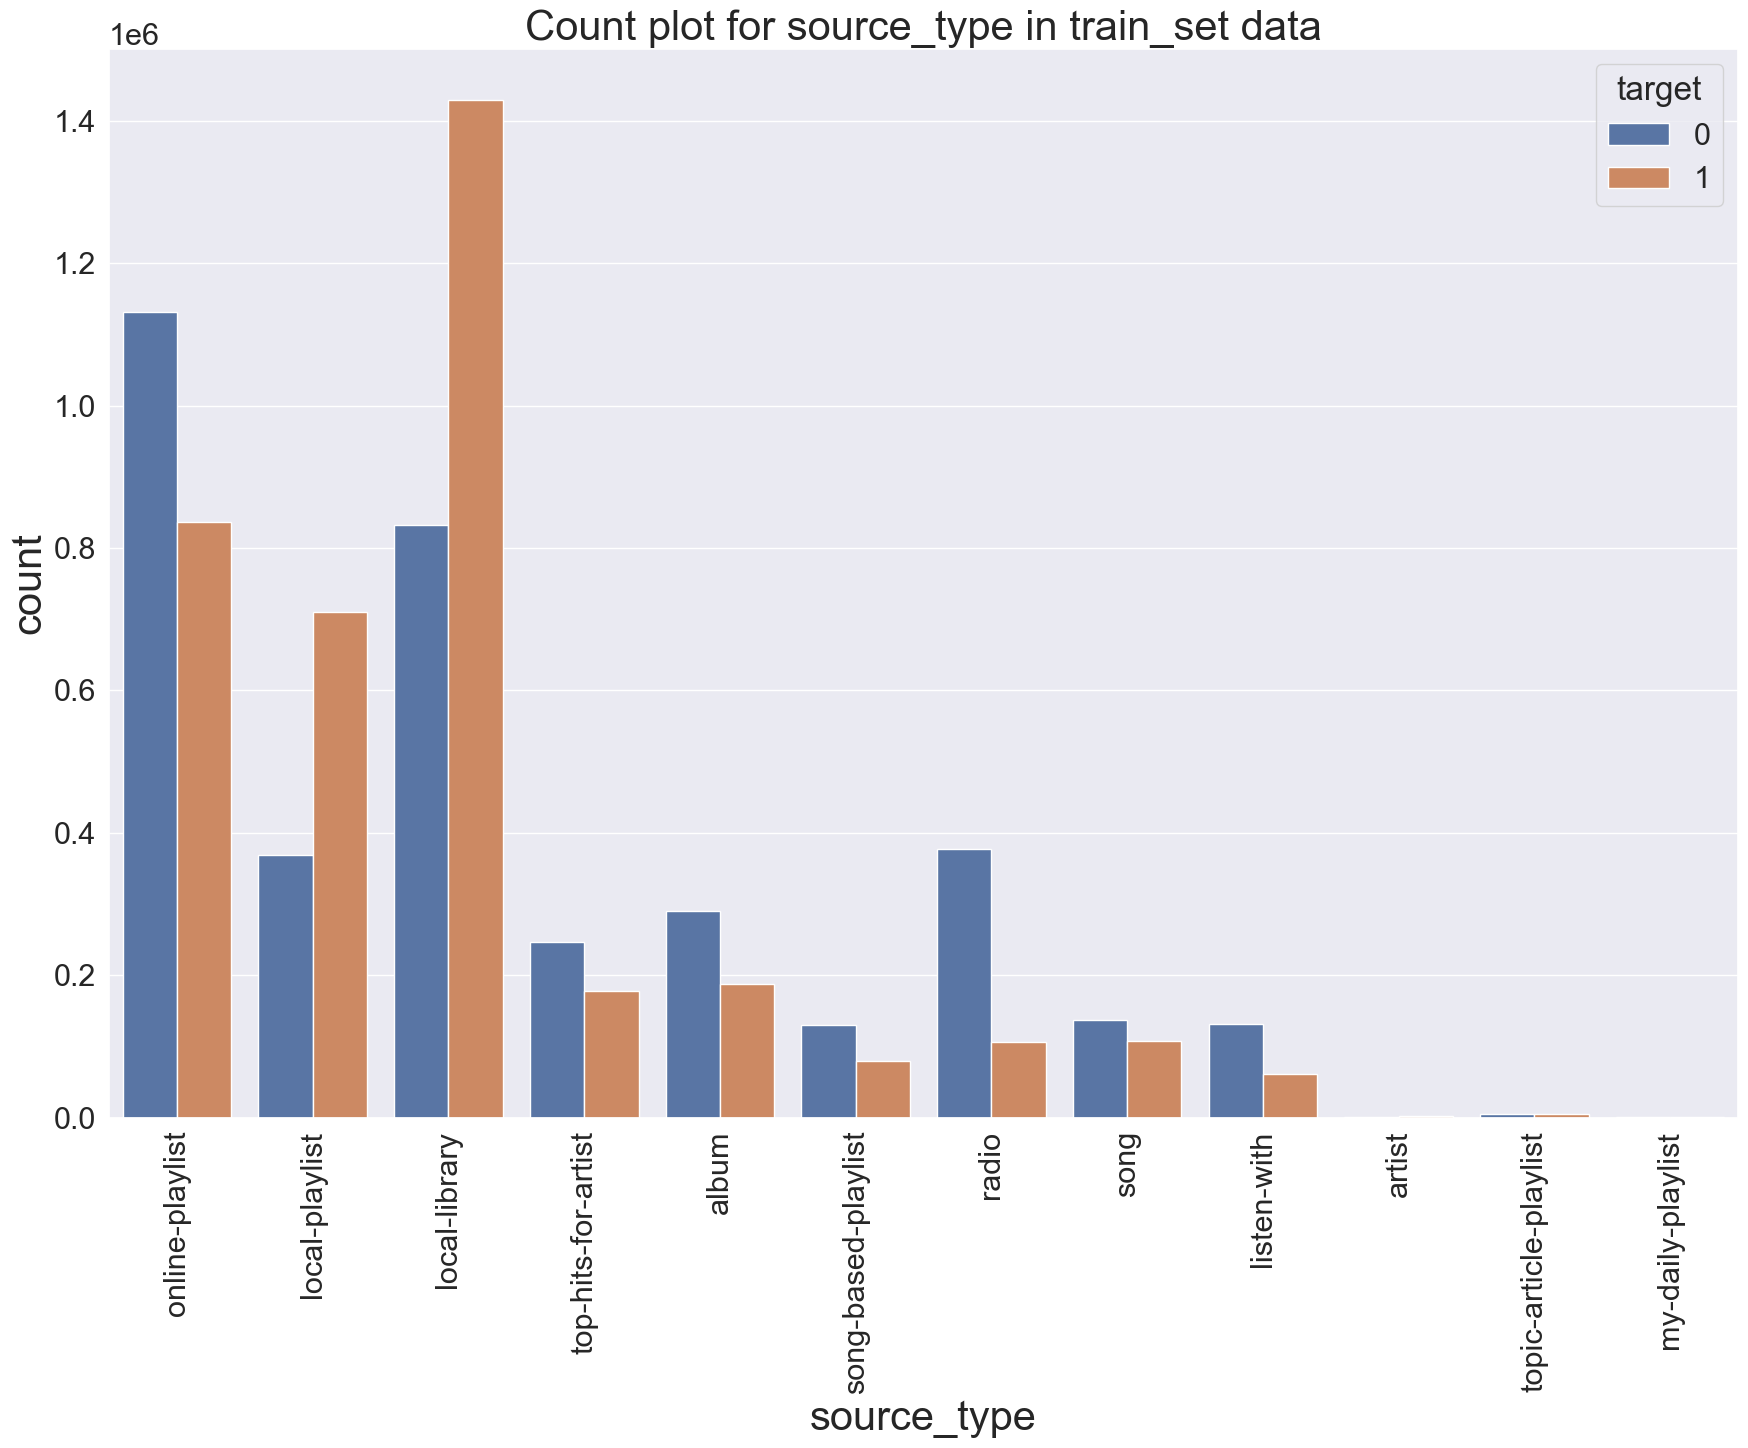

In [9]:
# count plot for the source type feature in relation to target
count_plot(train_set, 'source_type', 'target', 'train_set')

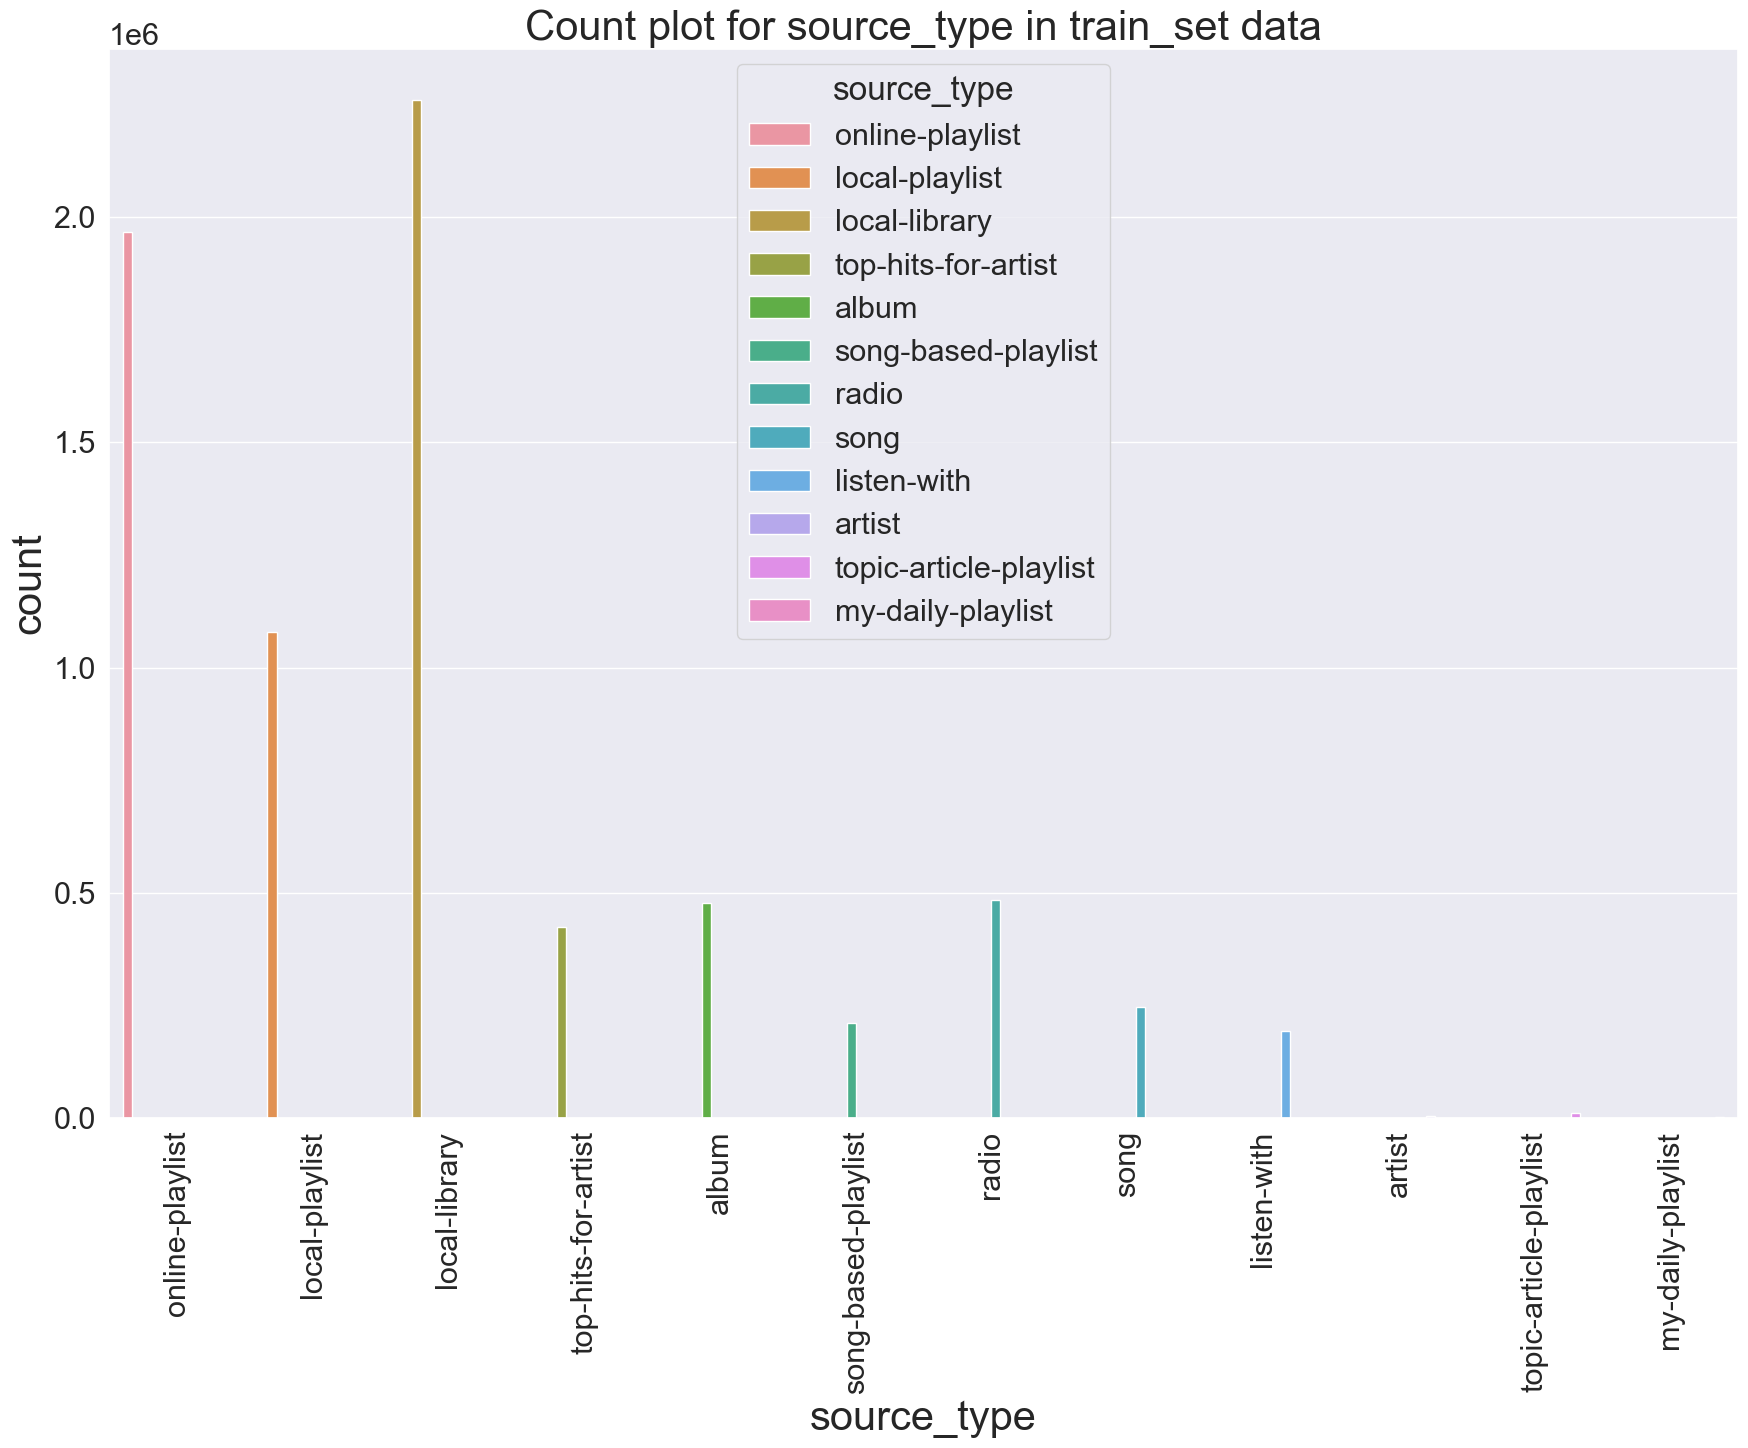

In [10]:
# count plot for the source type feature overall 
count_plot(train_set, 'source_type', 'source_type', 'train_set')

In [11]:
# source_type feature is the entry point of a users first listen of a song 
# most uers starts playing a song from 'local library' and 'online-playlist'
# users do not start listening to music with 'artist' or 'daily-playlist'

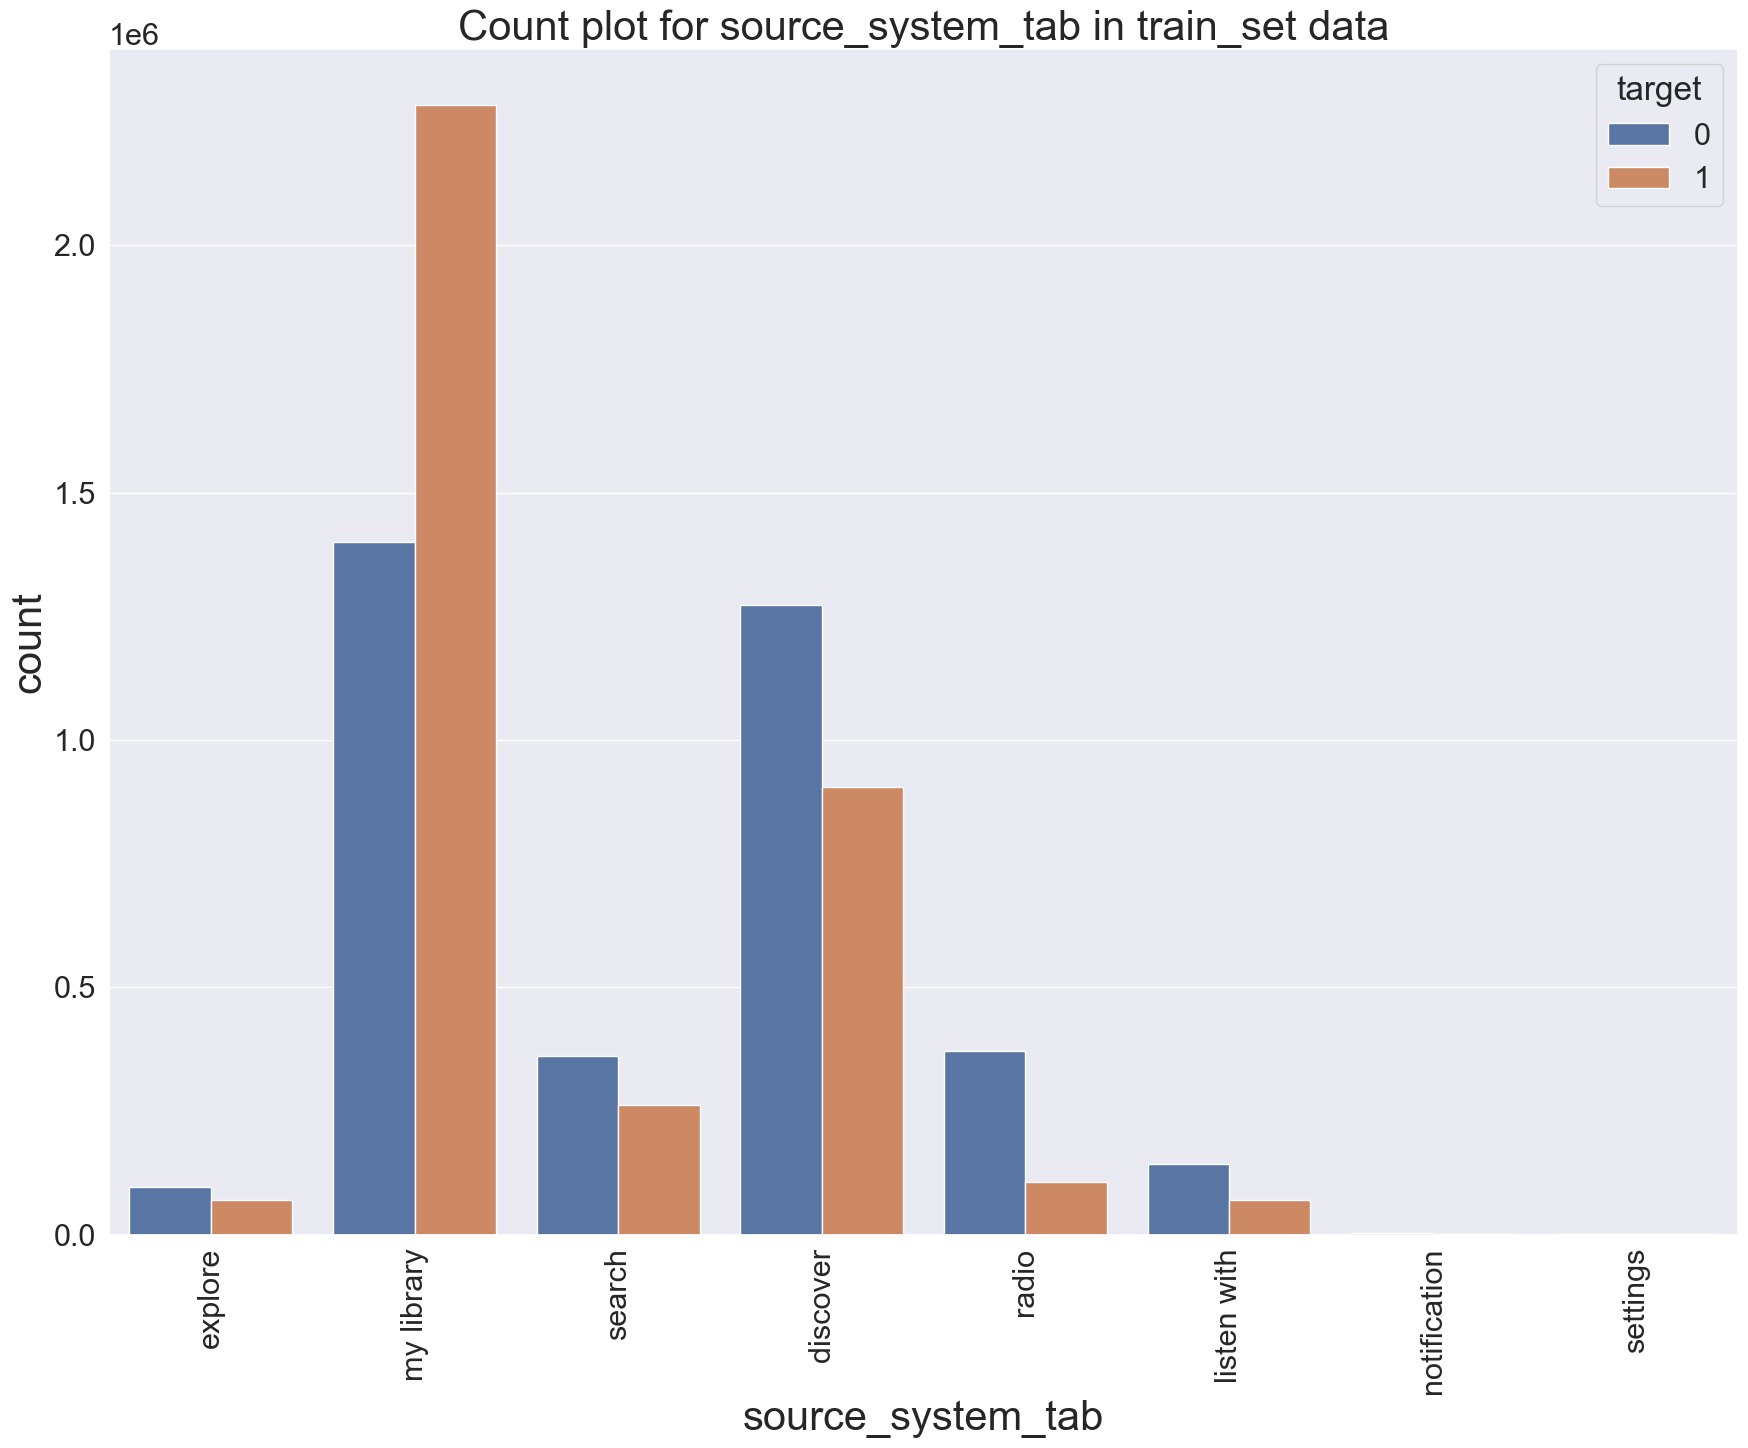

In [12]:
# count plot for the source system tab feature in relation to target
count_plot(train_set, 'source_system_tab', 'target', 'train_set')

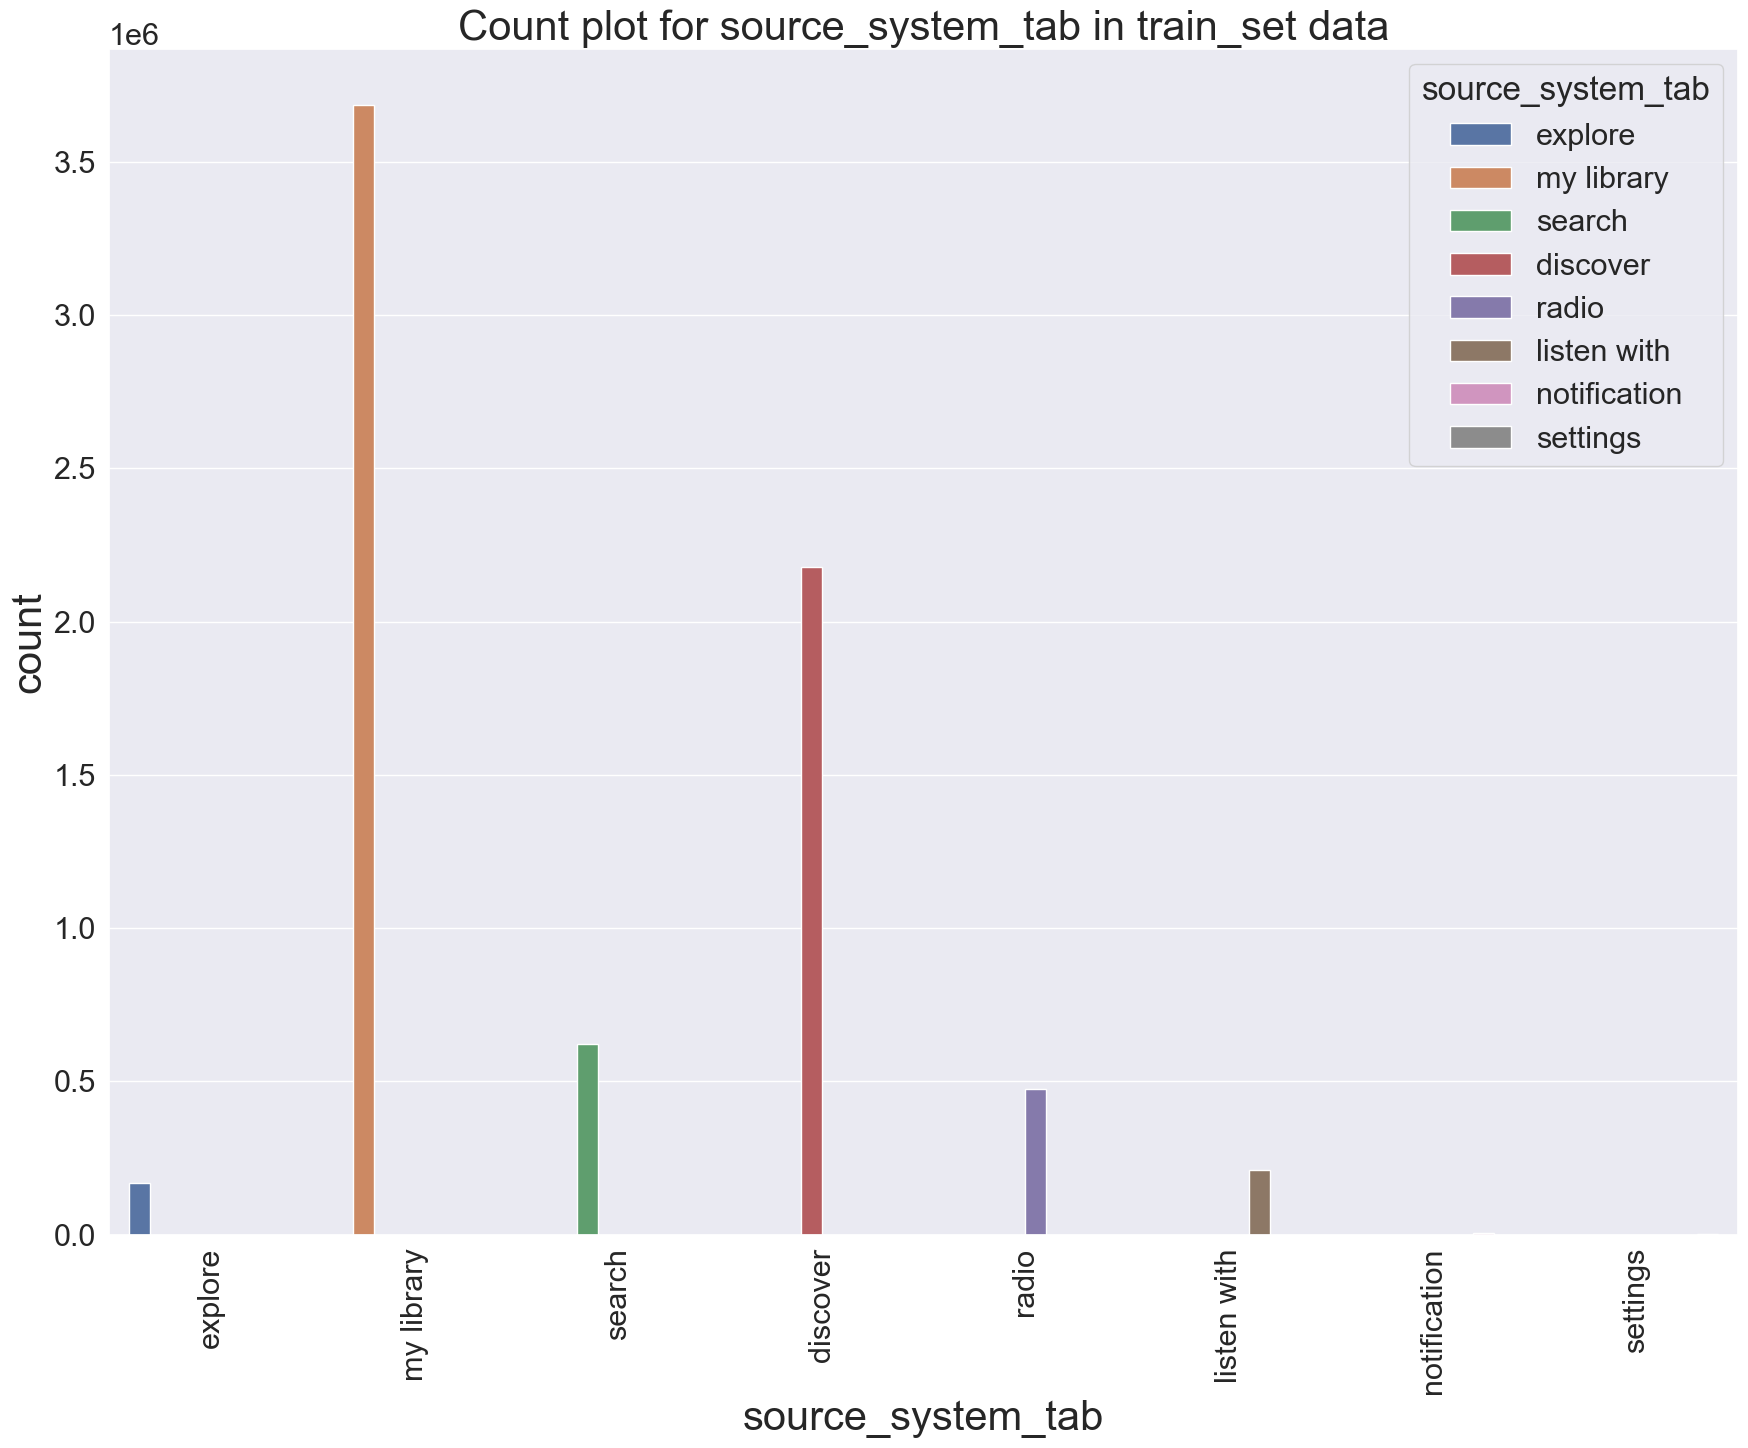

In [13]:
# count plot for the source system tab feature overall 
count_plot(train_set, 'source_system_tab', 'source_system_tab', 'train_set')

In [14]:
# source_system_tab indicates the name of the tab/page where the listening event was triggered.
# users repeat songs from their librabry and discovery tabs
# within the notification or setting tab users are not likely to repeat songs

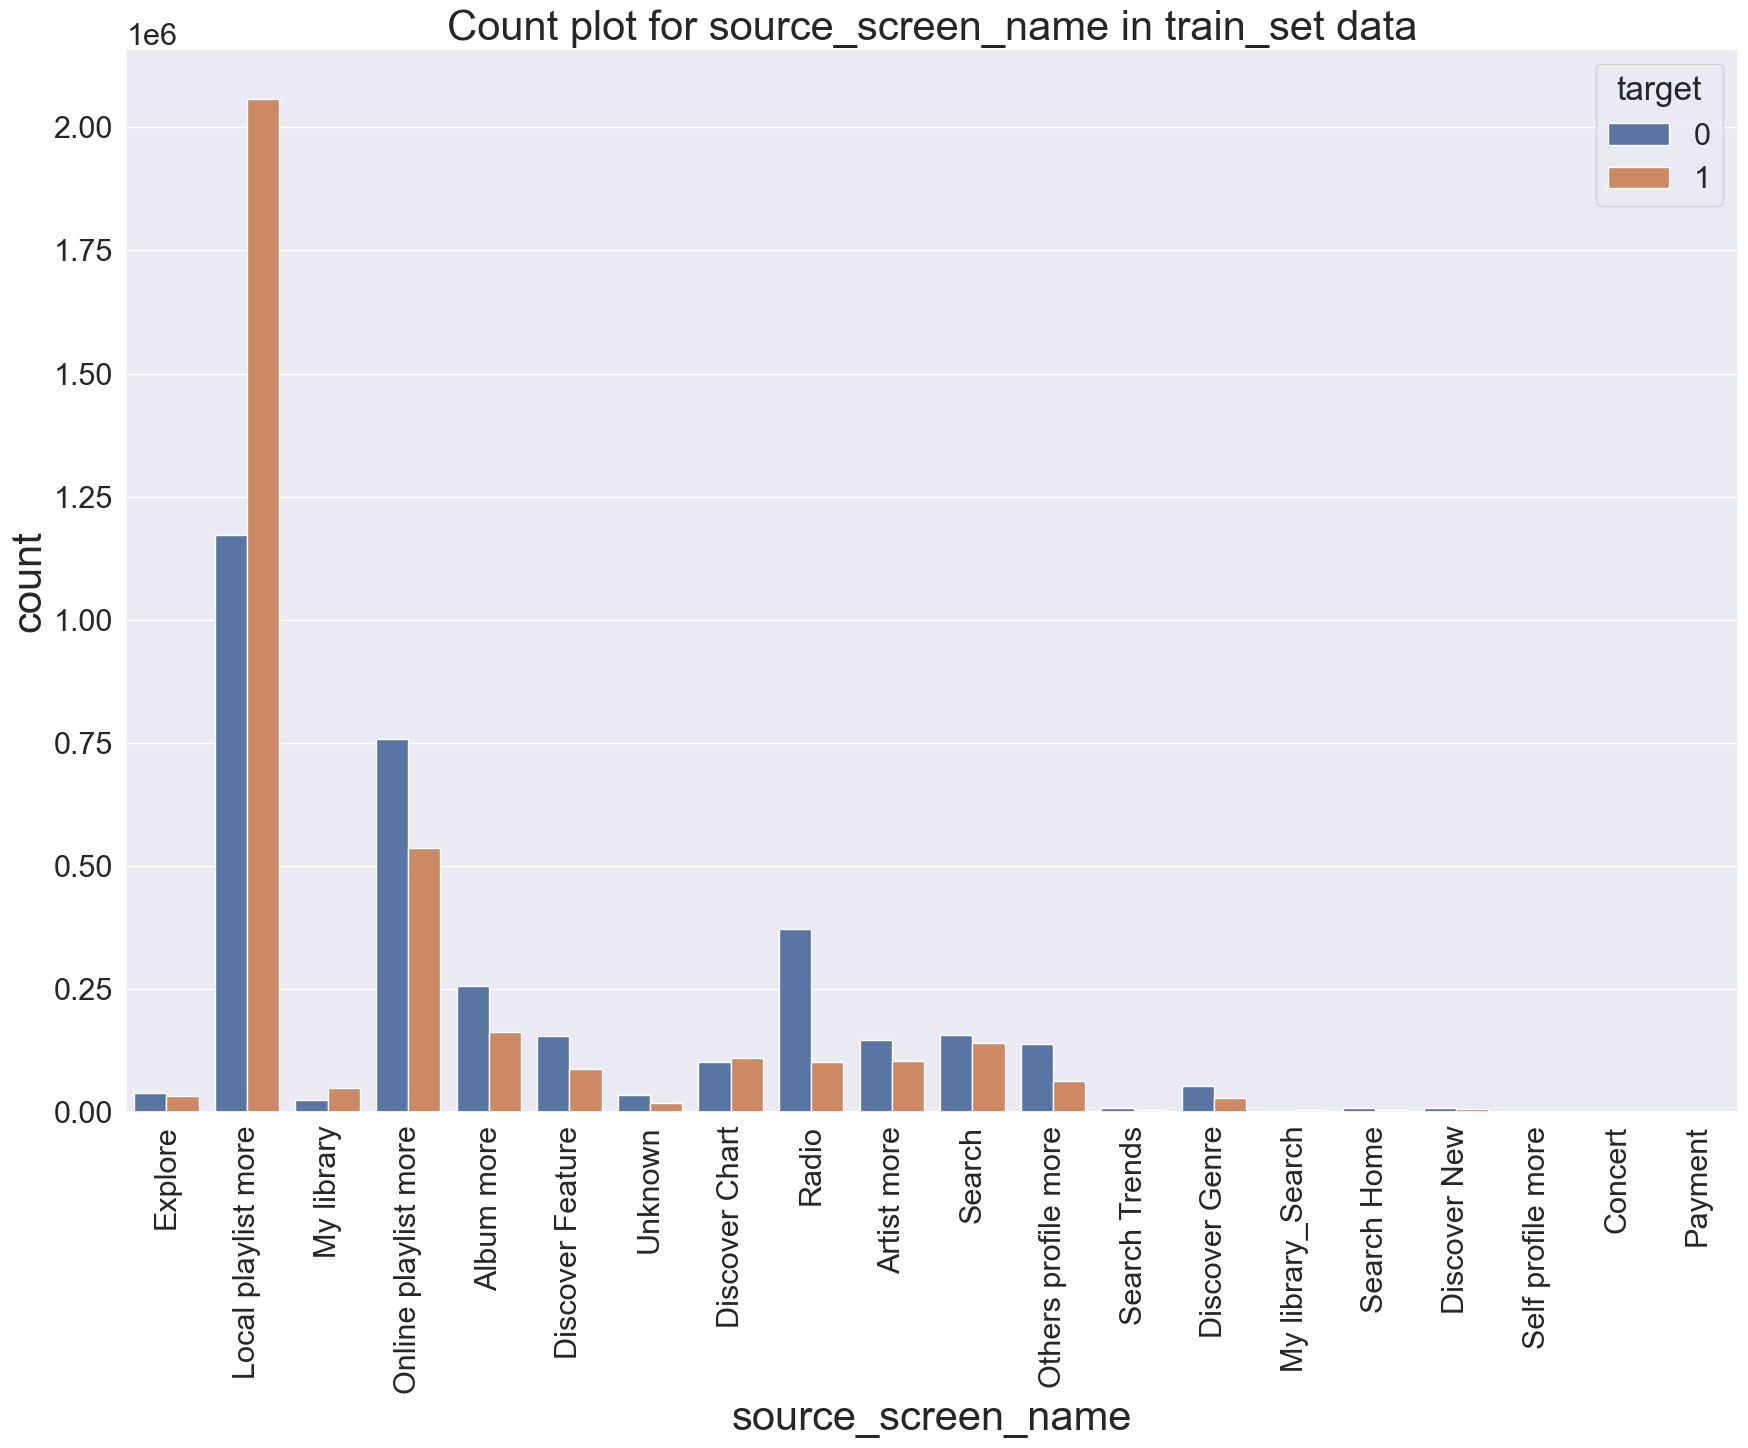

In [15]:
# count plot for the source screen name feature in relation to target
count_plot(train_set, 'source_screen_name', 'target', 'train_set')

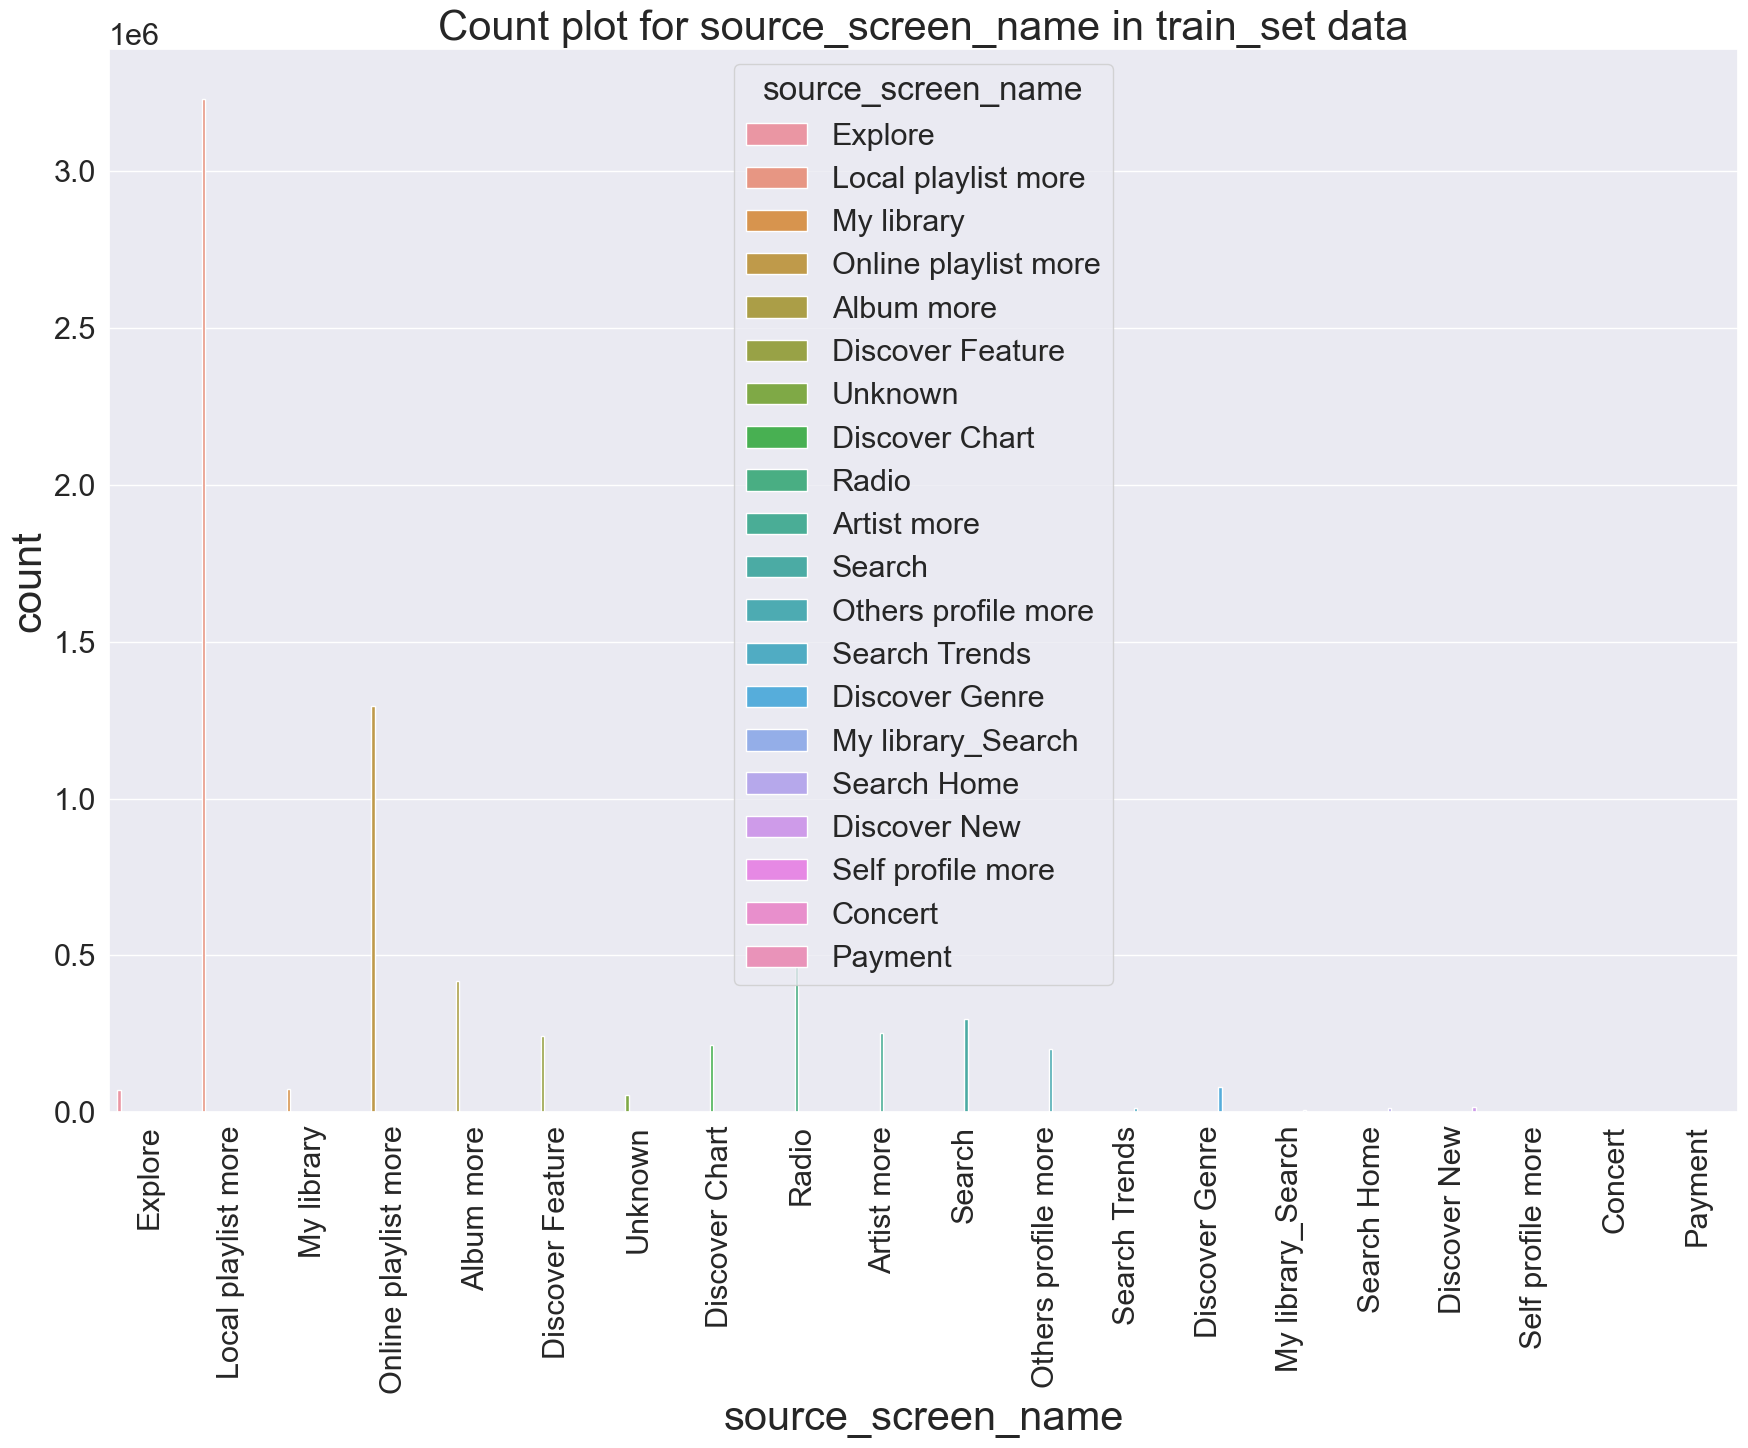

In [16]:
# count plot for the source screen name feature overall
count_plot(train_set, 'source_screen_name', 'source_screen_name', 'train_set')

In [17]:
# source_screen_name indicates the name of the layout the users sees during the listening event
# the majority of users prfer the local_playlist or online_playist layouts 

In [18]:
# memebers set feature analysis
members_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [19]:
# seaborn library helper function to plot histograms for categories
def count_plot_function(data, x):
  plt.figure(figsize=(18,15))
  sns.set(font_scale=2)
  sns.countplot(x=x, data=data)
  plt.xlabel(x,fontsize=30)
  plt.ylabel('count',fontsize=30)
  plt.xticks(rotation='90')
  plt.title('Count plot',fontsize=30)
  plt.tight_layout()

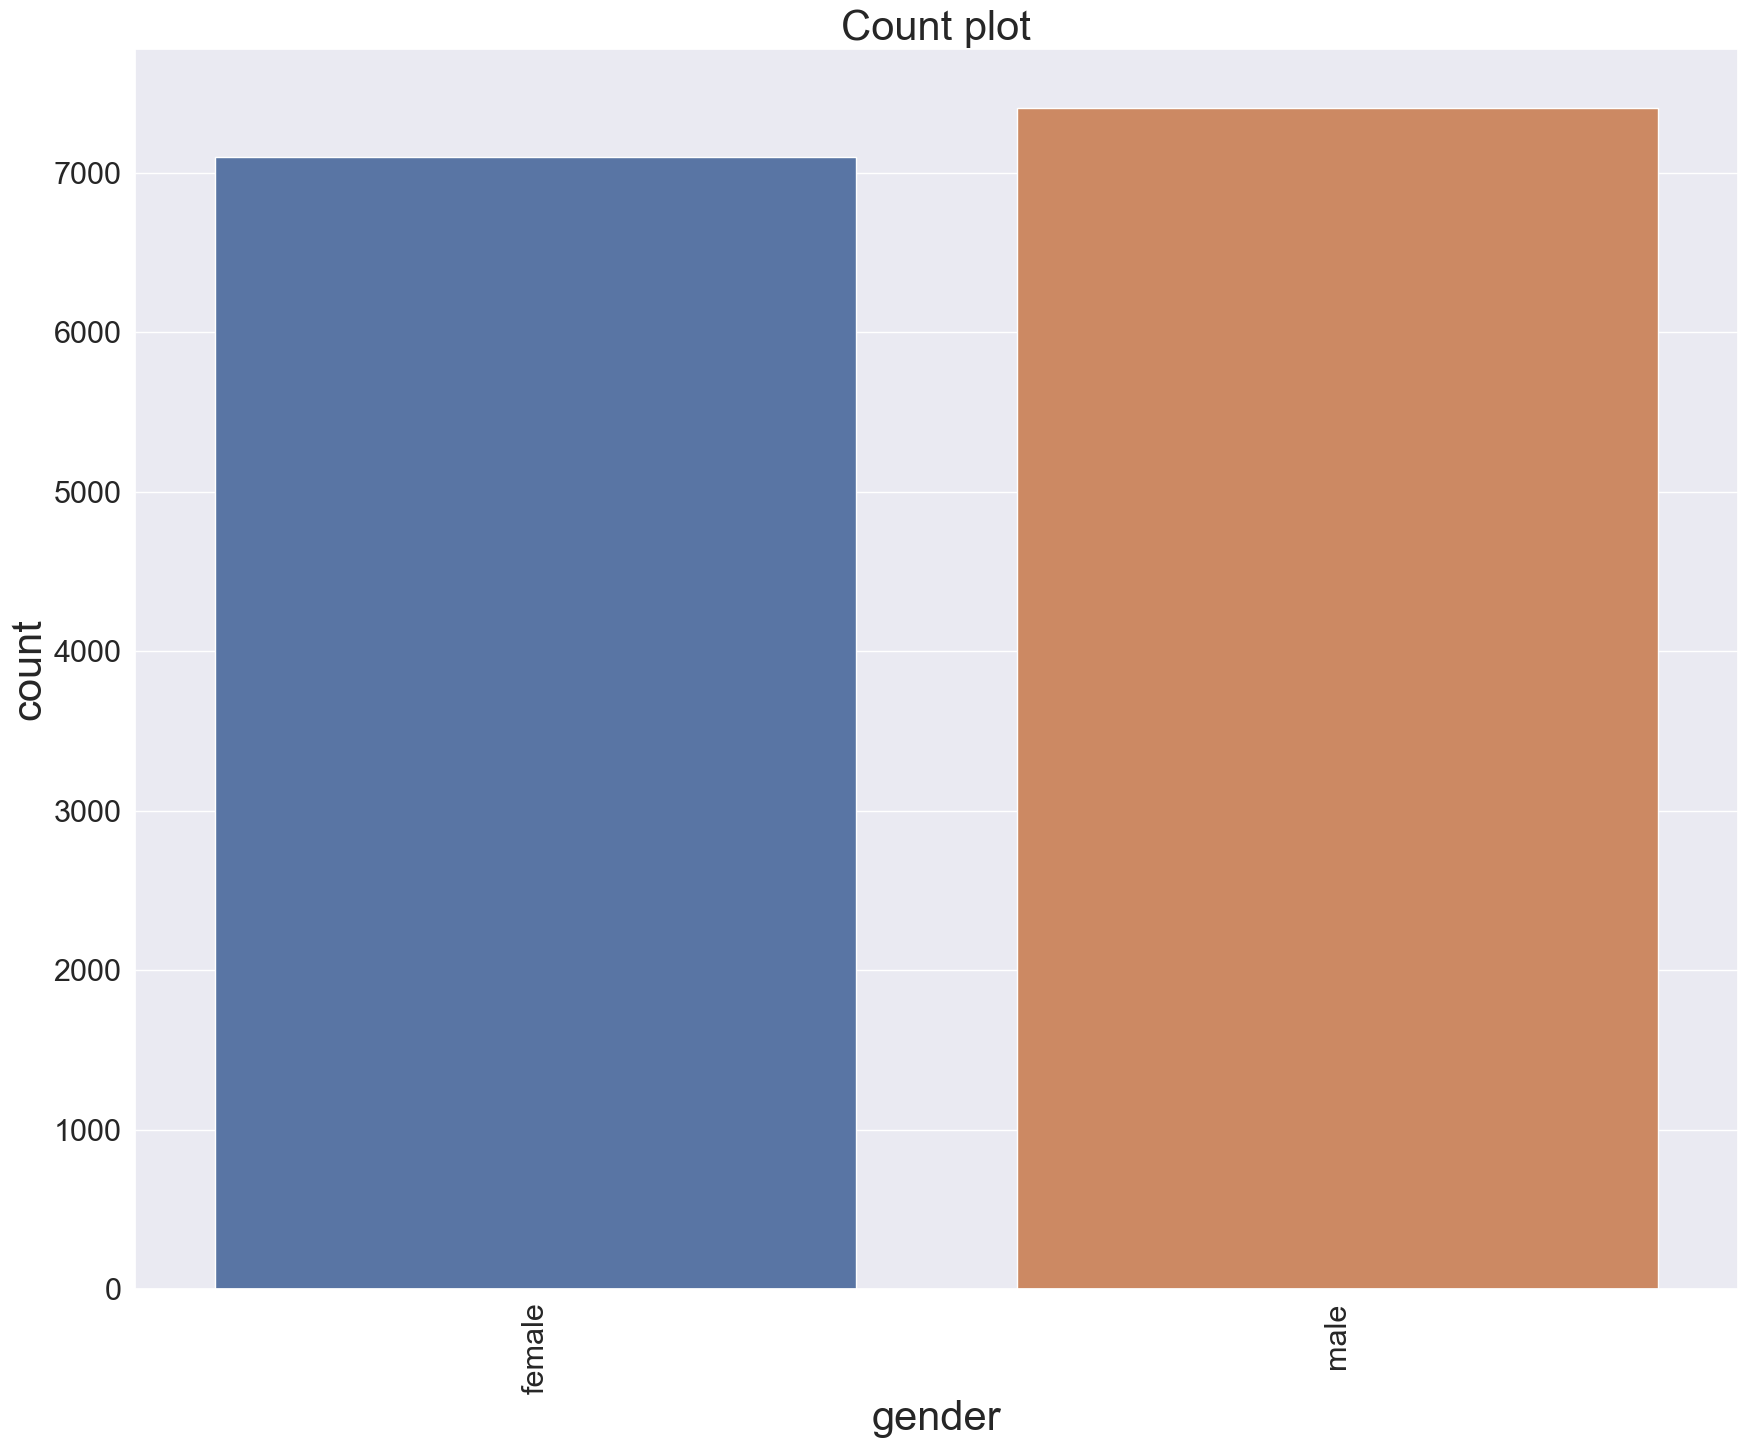

In [20]:
# countplot of the gender feature overall 
count_plot_function(members_set, 'gender')

In [21]:
# the user diversity between male and female is nearly balanced

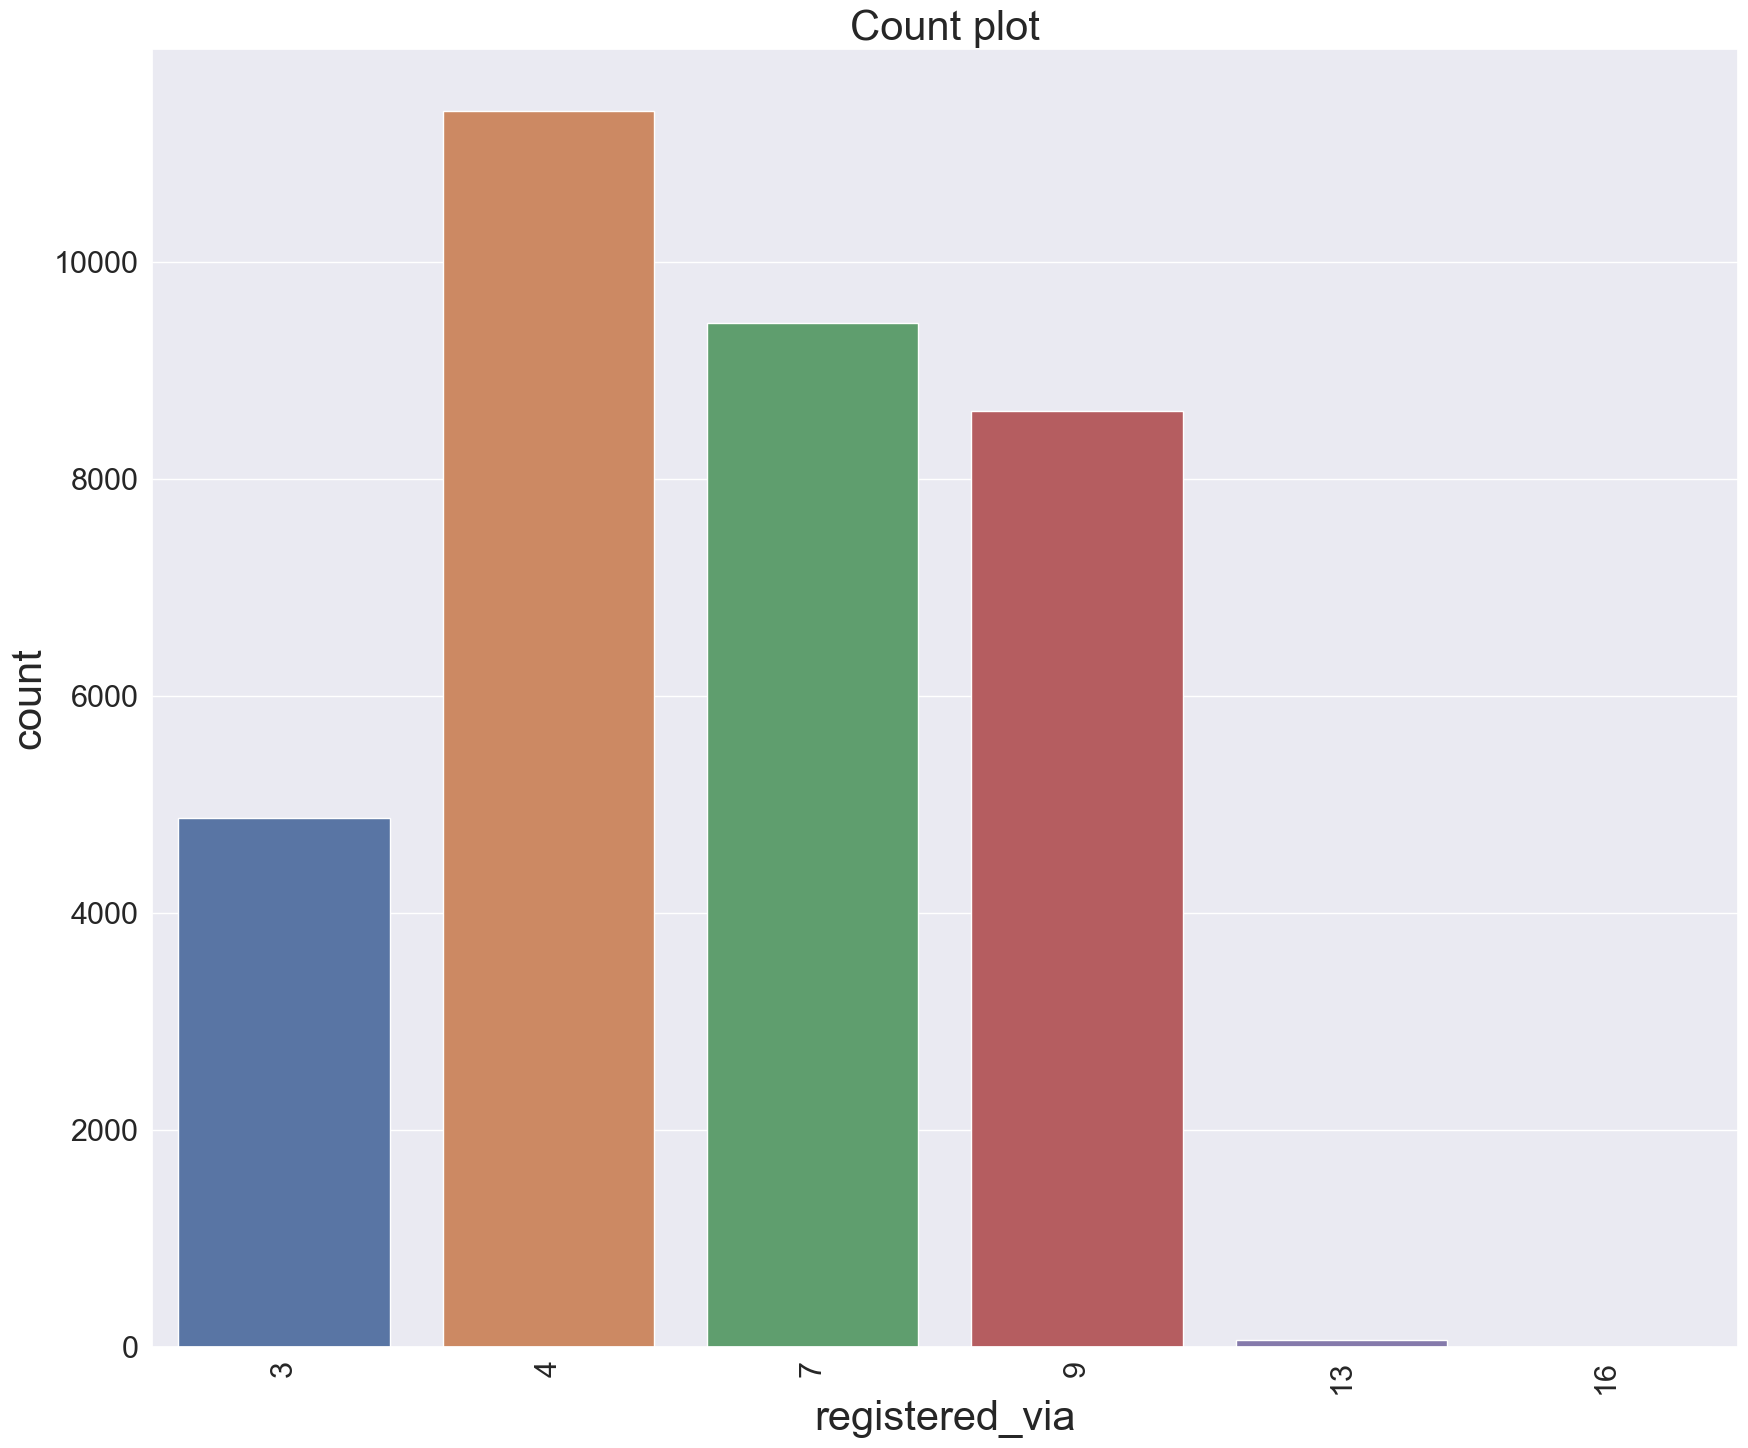

In [22]:
# countplot of the registered_via feature overall 
count_plot_function(members_set, 'registered_via')

In [23]:
# the majority of user registration occurs via '4', '7', and '9'.
# a very minimal number of users haver registered via '13' and '16'.

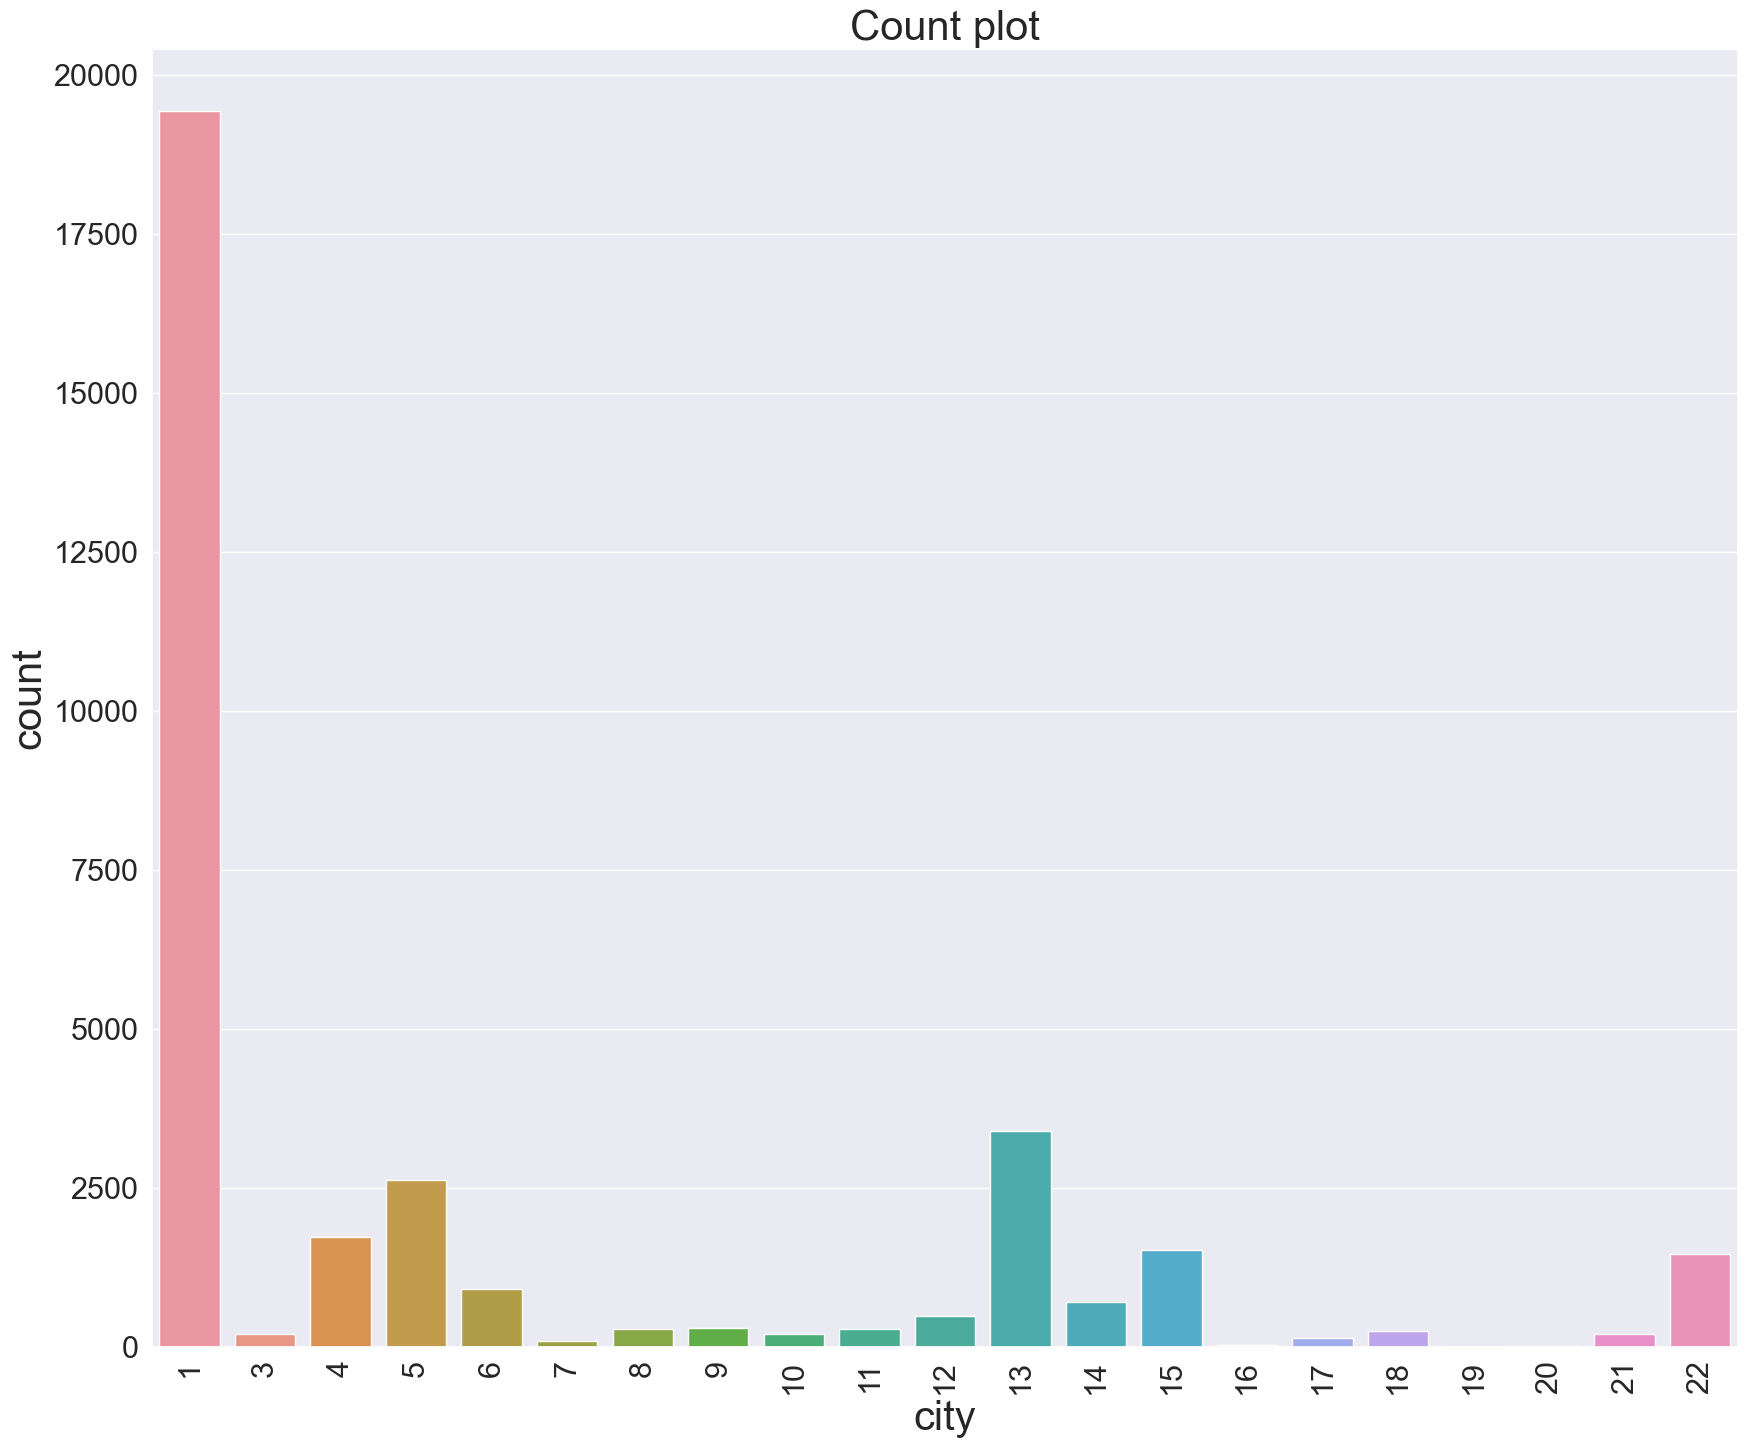

In [24]:
# countplot of the city feature overall 
count_plot_function(members_set, 'city')

In [25]:
# the majority of users that are associated with the '1' labelled city. 
# the overall data set is very skewed toward this 'city' label

Text(0.5, 1.0, 'Density Distribution Plot for registration_init_time')

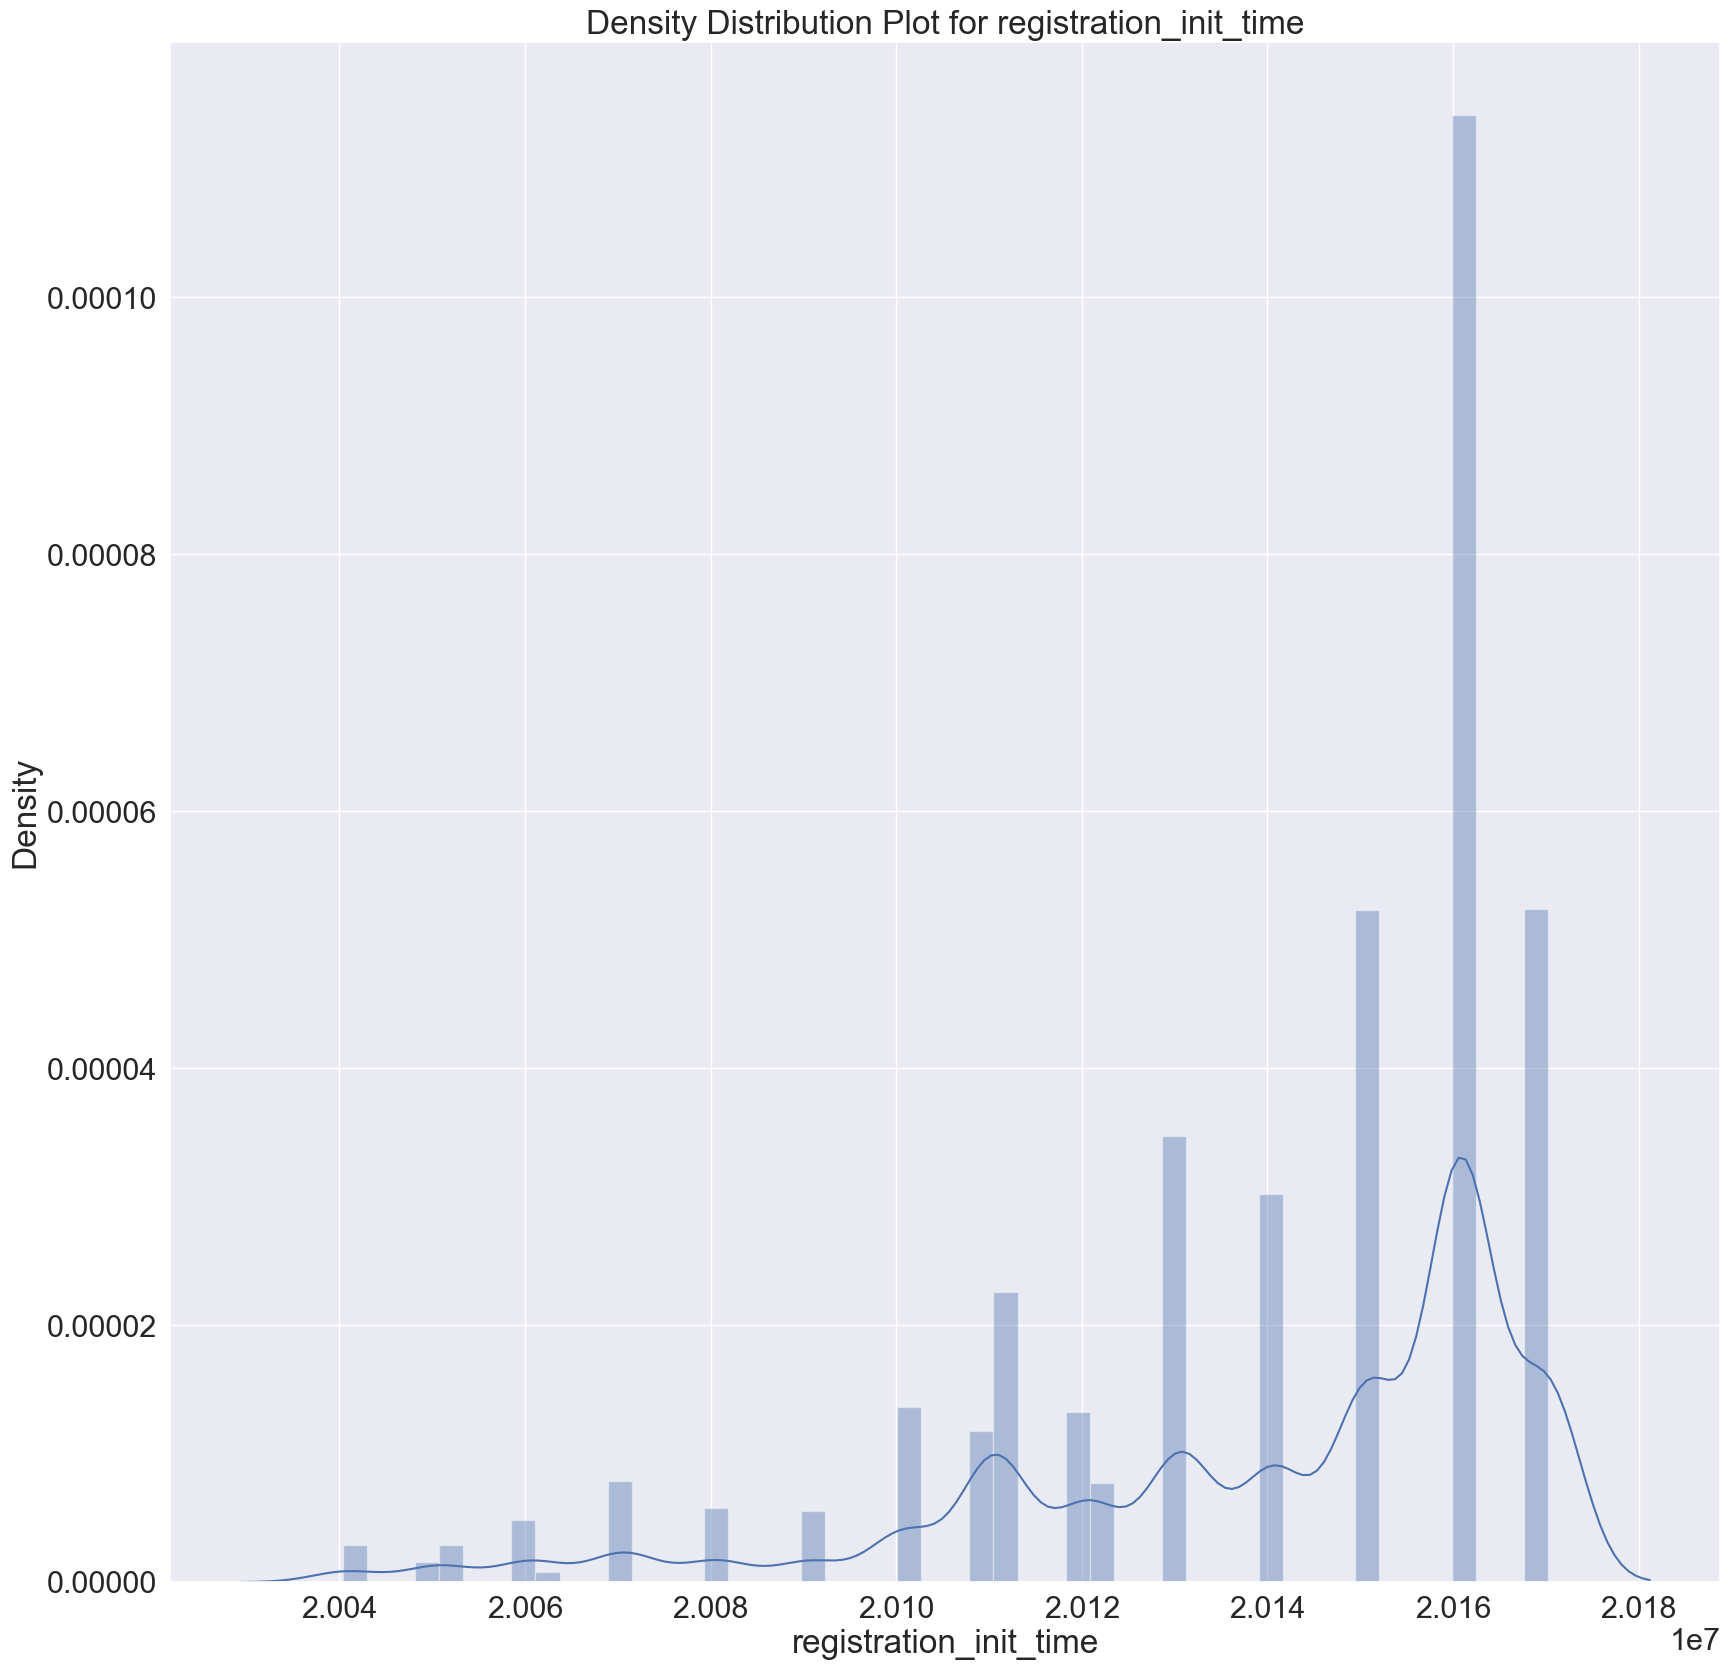

In [26]:
# density distribution plot for the feature of registration_init_time 
plt.figure(figsize = (20, 20)) 
sns.histplot(members_set.registration_init_time, kde=True, stat="density",kde_kws=dict(cut=3),alpha=.4,edgecolor=(1,1,1,.4),bins=50)
sns.set(font_scale=2)
plt.title('Density Distribution Plot for registration_init_time')

In [27]:
# we notice during the time range of the datset users were more inclined to register for listening to 
# music through the app as time went on. (later dates)

Text(0.5, 1.0, 'Density Distribution Plot for expiration_date')

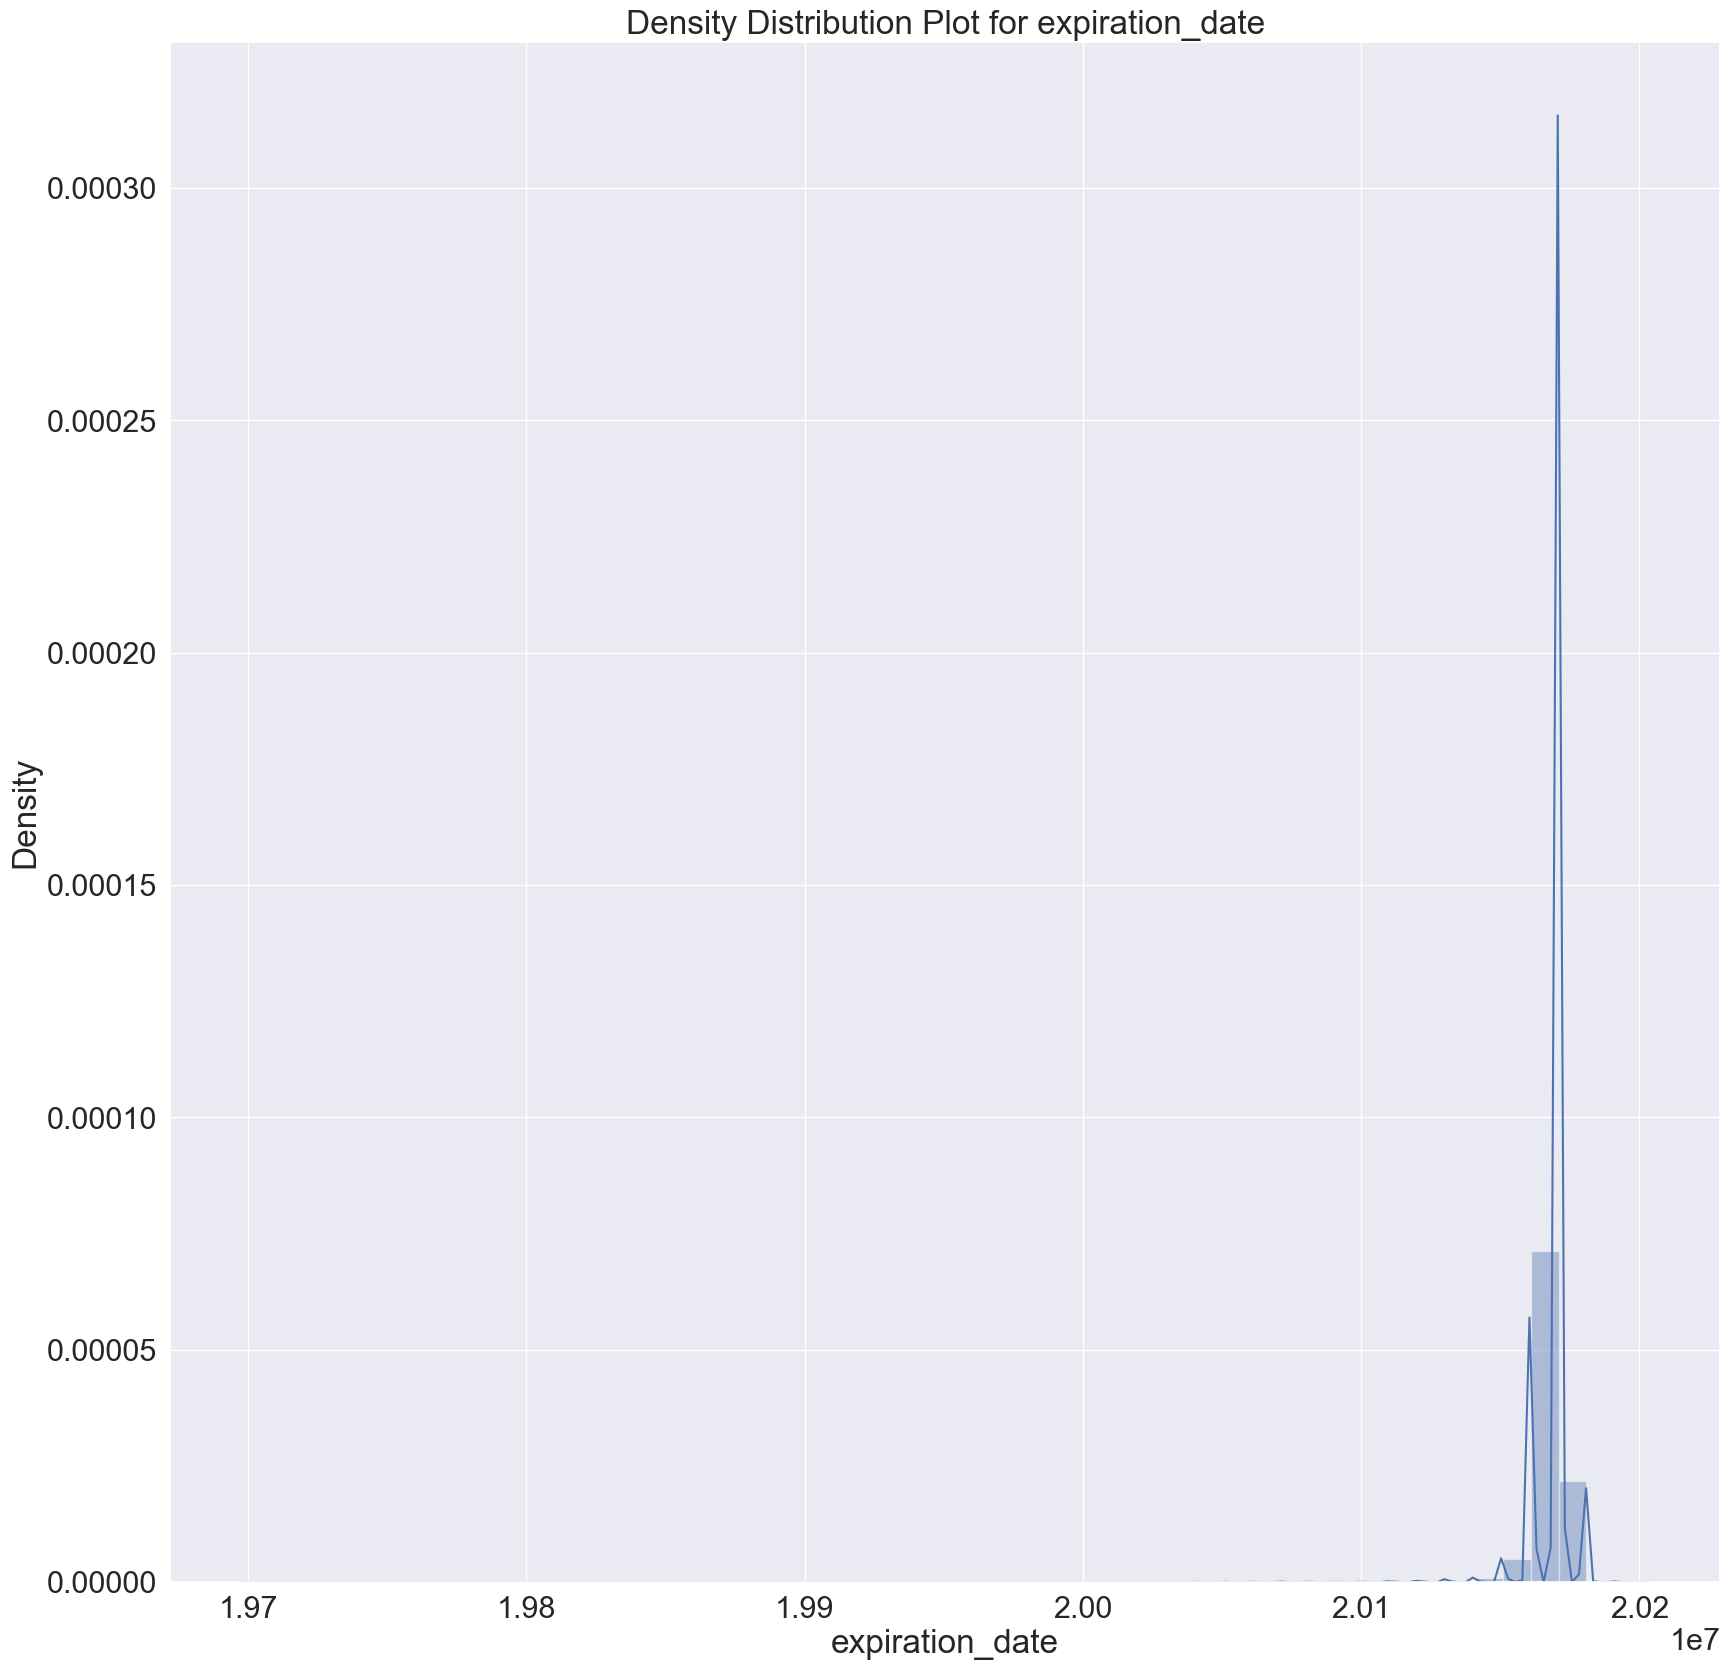

In [28]:
# density distribution plot for the feature of expiration_date 
plt.figure(figsize = (20, 20)) 
sns.histplot(members_set.expiration_date, kde=True, stat="density",kde_kws=dict(cut=3),alpha=.4,edgecolor=(1,1,1,.4),bins=50)
sns.set(font_scale=2)
plt.title('Density Distribution Plot for expiration_date')

In [29]:
# similarly there's a correlation with the expiration date and the registration date, users are 
# more likley to renew their accounts making them more likely to listen to a song again 

In [30]:
# unique bd (age) in the members data set
members_set.bd.unique()

array([   0,   43,   28,   33,   20,   30,   29,   26,   25,   21,   22,
         16,   23,   37,   18,   19,   51,   24,   17,   45,   36,   57,
         27,   34,   32,   15,   48,   50,   54,   47,   35,   46,   31,
         14,   41,   59,    2,   40,   38,   55,   39,   73,   49,   44,
        103,   52,   70,   42,   65,   56,  101,   58,   53,   64,   63,
         76,   66,   97,    3,   72,   67,   62,   61,  105,   60,   13,
         90,   12,   68,  131,   74,   89,  931,  -38,  144,   85,  112,
         96,   11,  102,   83, 1051,   87,    7,   95,  -43,  111,   93,
          5,   78, 1030,  106,  107,   82,   10], dtype=int64)

In [31]:
# there are some clear outliers like 1030, -38, -43, 1051, etc., which will be handled in our feature engineering
# As age cannot be negative value or more than 1000 for humans

Text(0.5, 1.0, 'Density Distribution Plot for expiration_date')

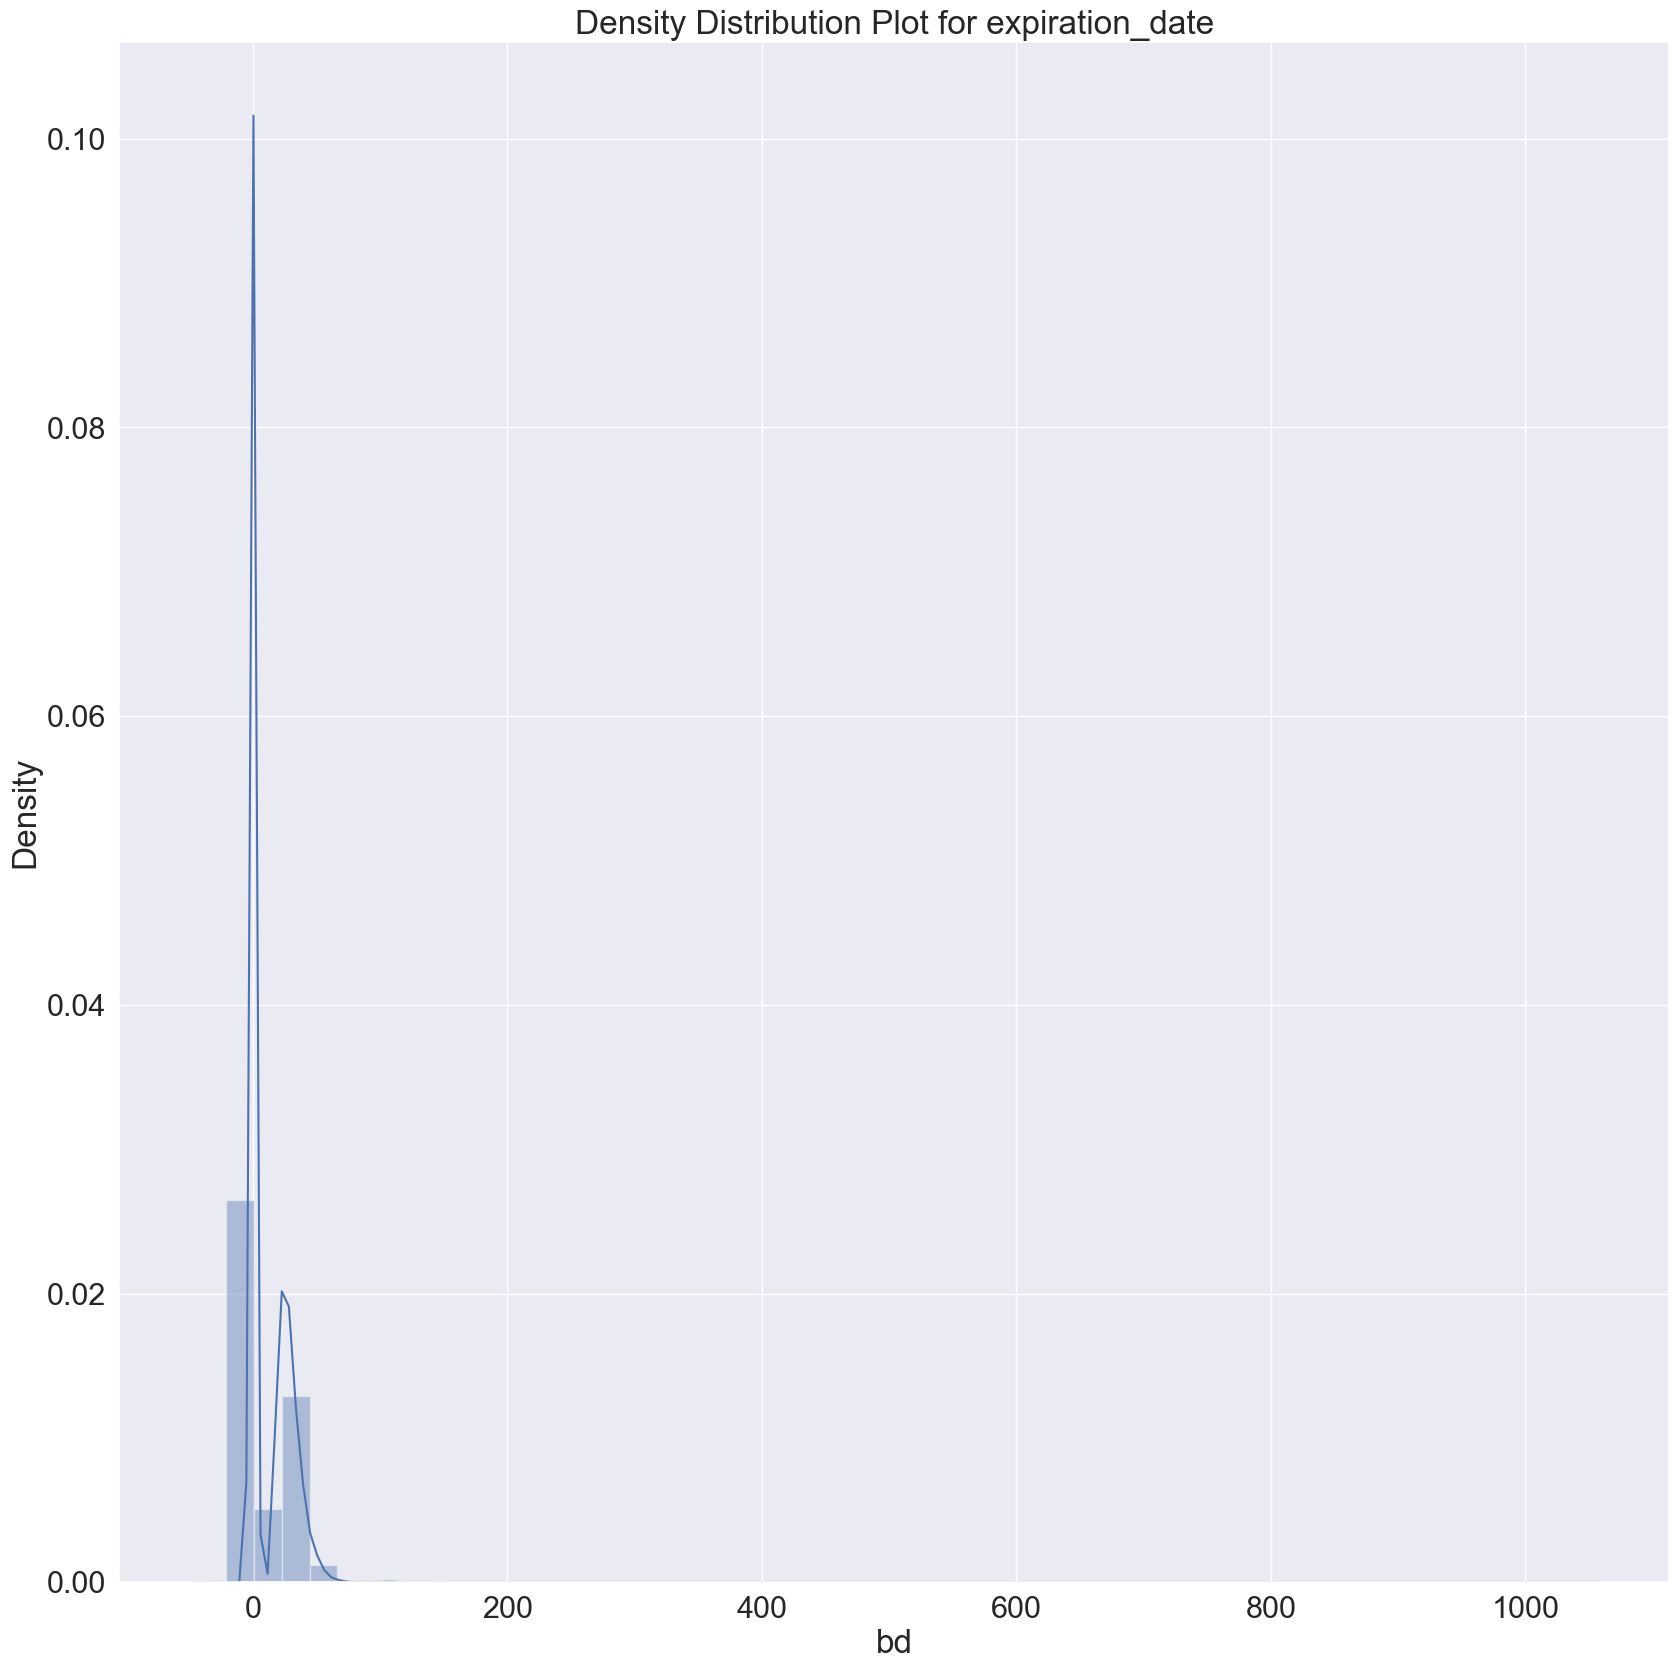

In [32]:
# density distribution plot for the feature of bd (age)
plt.figure(figsize = (20, 20)) 
sns.histplot(members_set.bd, kde=True, stat="density",kde_kws=dict(cut=3),alpha=.4,edgecolor=(1,1,1,.4),bins=50)
sns.set(font_scale=2)
plt.title('Density Distribution Plot for expiration_date')

In [33]:
# most occuring bd (age) in our dataset
np.percentile(members_set['bd'].values, 98)

47.0

In [34]:
# the 98th percentile of our ages is 47
# most users in our data set are below 50

In [35]:
# feature analysis for our songs data_set
# first we'll merge the songs_set with the song_extrainfo_set
songs_complete_info = songs_set.merge(song_extrainfo_set, on="song_id")

In [36]:
# analyze the feature of language 
songs_complete_info['language'].unique()

array([ 3., 31., 52., 17., 10., -1., 24., 59., 45., 38., nan])

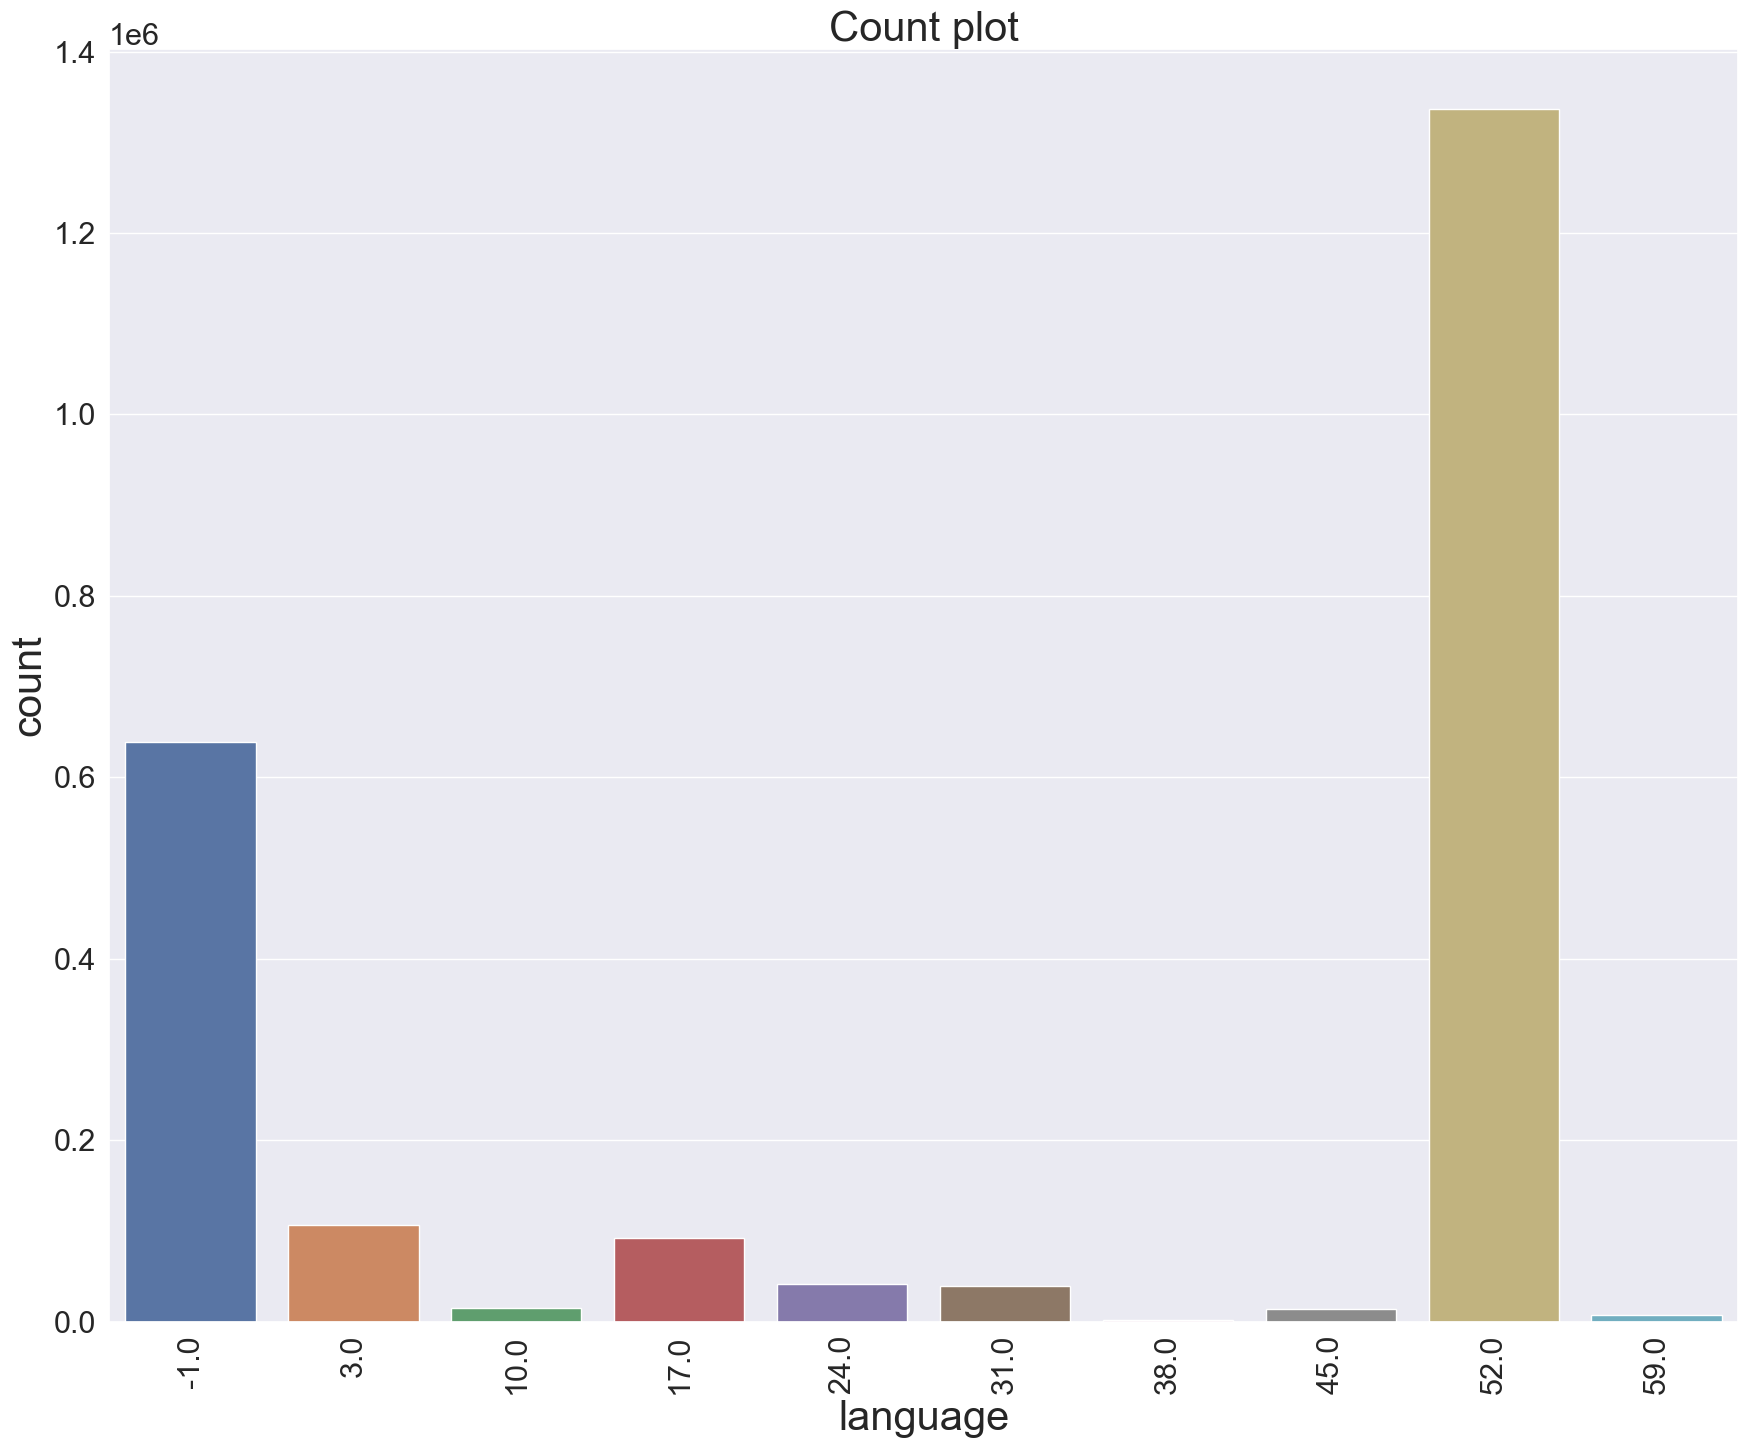

In [37]:
# countplot of the language feature overall 
count_plot_function(songs_complete_info, 'language')

In [38]:
# the majority of users listen to songs with the '52' langauge, the '-1' language is the 2nd most occurrence

In [39]:
# helper function to analyze missing or null values in each data set 
def null_values_check(df):
    dataTypes = pd.DataFrame(df.dtypes,columns=["Data Type"])
    dataTypes["Unique Values"] = df.nunique().sort_values(ascending=True)
    dataTypes["Null Values"] = df.isnull().sum()
    dataTypes["% null Values"] = (df.isnull().sum()/len(df))*100
    return dataTypes.sort_values(by="Null Values" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

In [40]:
print("Missing/Null Analysis for Training Data Set")
null_values_check(train_set)

Missing/Null Analysis for Training Data Set


,Data Type,Unique Values,Null Values,% null Values
source_screen_name,object,20,414804,5.622618
source_system_tab,object,8,24849,0.336825
source_type,object,12,21539,0.291959
msno,object,30755,0,0.000000
song_id,object,359966,0,0.000000
target,int64,2,0,0.000000


In [41]:
print("Missing/Null Analysis for Members Data Set")
null_values_check(members_set)

Missing/Null Analysis for Members Data Set


,Data Type,Unique Values,Null Values,% null Values
gender,object,2,19902,57.849606
msno,object,34403,0,0.000000
city,int64,21,0,0.000000
bd,int64,95,0,0.000000
registered_via,int64,6,0,0.000000
registration_init_time,int64,3862,0,0.000000
expiration_date,int64,1484,0,0.000000


In [42]:
print("Missing/Null Analysis for Songs Complete Info Data Set")
null_values_check(songs_complete_info)

Missing/Null Analysis for Songs Complete Info Data Set


,Data Type,Unique Values,Null Values,% null Values
lyricist,object,110884,1944523,84.713094
composer,object,329729,1070938,46.655386
isrc,object,1806410,136530,5.947926
genre_ids,object,1045,94073,4.098288
name,object,1168763,2,0.000087
language,float64,10,1,0.000044
song_id,object,2295422,0,0.000000
song_length,int64,146517,0,0.000000
artist_name,object,222307,0,0.000000


In [43]:
# we notice that training data set has overall missing values below 6%
# the members data set has a high null feature of 'gender' at 57.85%
# songs data set has high null values at 'lyricist' at 84.71% and 'composer' at 46.65%

In [44]:
# we fully merge our training and test data sets with the members and song complete info data sets
train_members_merged_set = pd.merge(train_set,members_set, on='msno', how='left')
train_full_merged_set = pd.merge(train_members_merged_set, songs_complete_info, on='song_id', how='left')
print("Finished merging and creating the train_full_merged_set")

Finished merging and creating the train_full_merged_set


In [45]:
test_members_merged_set = pd.merge(test_set,members_set, on='msno', how='left')
test_full_merged_set = pd.merge(test_members_merged_set, songs_complete_info, on='song_id', how='left')
print("Finished merging and creating the test_full_merged_set")

Finished merging and creating the test_full_merged_set


In [46]:
# delete the temporary merged data frames 
del train_members_merged_set
del test_members_merged_set

In [47]:
# check the missing/null values stats for our full train merged set
null_values_check(train_full_merged_set)

,Data Type,Unique Values,Null Values,% null Values
lyricist,object,33874,3179542,43.098303
gender,object,2,2961479,40.142486
composer,object,76034,1676694,22.727382
isrc,object,269720,577963,7.834218
source_screen_name,object,20,414804,5.622618
genre_ids,object,572,119906,1.625311
source_system_tab,object,8,24849,0.336825
source_type,object,12,21539,0.291959
language,float64,10,1605,0.021756
name,object,234111,1571,0.021295


In [48]:
# highest missing/null values are 'lyricist' at 43.09%, 'gender' at 40.14%, and 'composer' at 22.7% 
# all other features are less than 8% in missing/null values
# delete all other unmerged data set
del train_set
del test_set
del members_set
del songs_set
del song_extrainfo_set

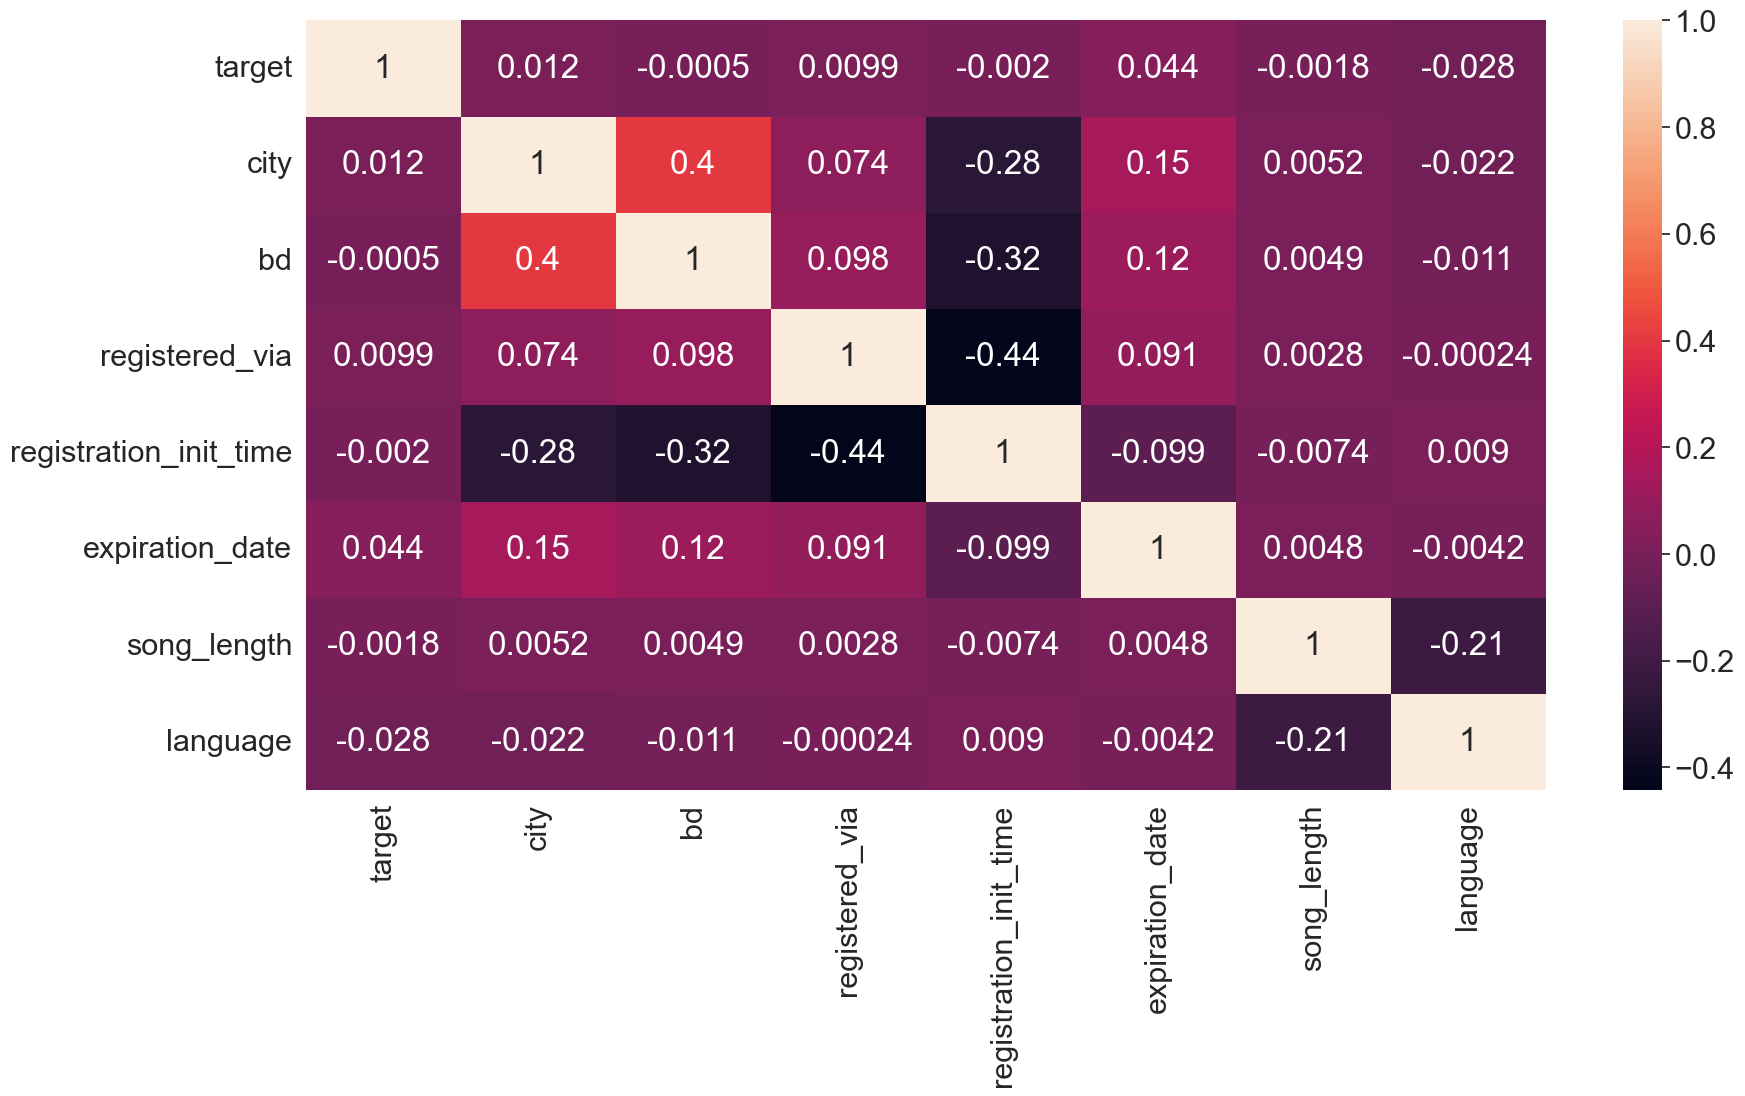

In [49]:
# let's view the correlation matrix of all features
plt.figure(figsize=[20,10])
sns.heatmap(train_full_merged_set.corr(), annot=True)
plt.show()

In [50]:
train_full_merged_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   msno                    object 
 1   song_id                 object 
 2   source_system_tab       object 
 3   source_screen_name      object 
 4   source_type             object 
 5   target                  int64  
 6   city                    int64  
 7   bd                      int64  
 8   gender                  object 
 9   registered_via          int64  
 10  registration_init_time  int64  
 11  expiration_date         int64  
 12  song_length             float64
 13  genre_ids               object 
 14  artist_name             object 
 15  composer                object 
 16  lyricist                object 
 17  language                float64
 18  name                    object 
 19  isrc                    object 
dtypes: float64(2), int64(6), object(12)
memory usage: 1.2+ GB


In [51]:
train_full_merged_set.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,284584.0,1259,Various Artists,NaN,NaN,52.0,Lords of Cardboard,US3C69910183
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,Hip Hop Is Dead(Album Version (Edited)),USUM70618761
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,Disco Africa,GBUQH1000063
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,Sleep Without You,QM3E21606003


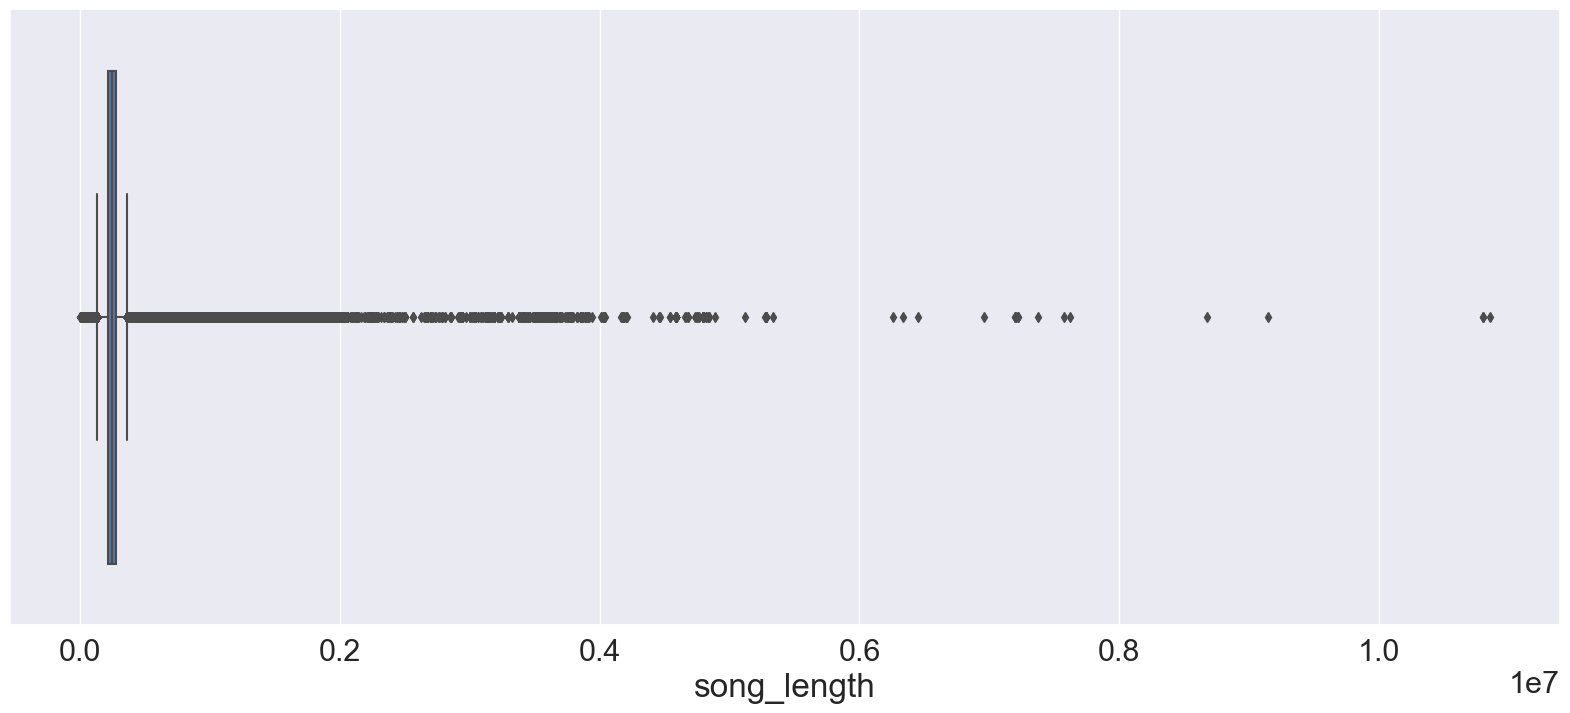

In [52]:
# boxplots of features with null values to decide if mean, median or mode for interpolation 
fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x=train_full_merged_set.song_length)
plt.show()
# we see that song_length is skewed to the left, we can use either median or mode to replace null values

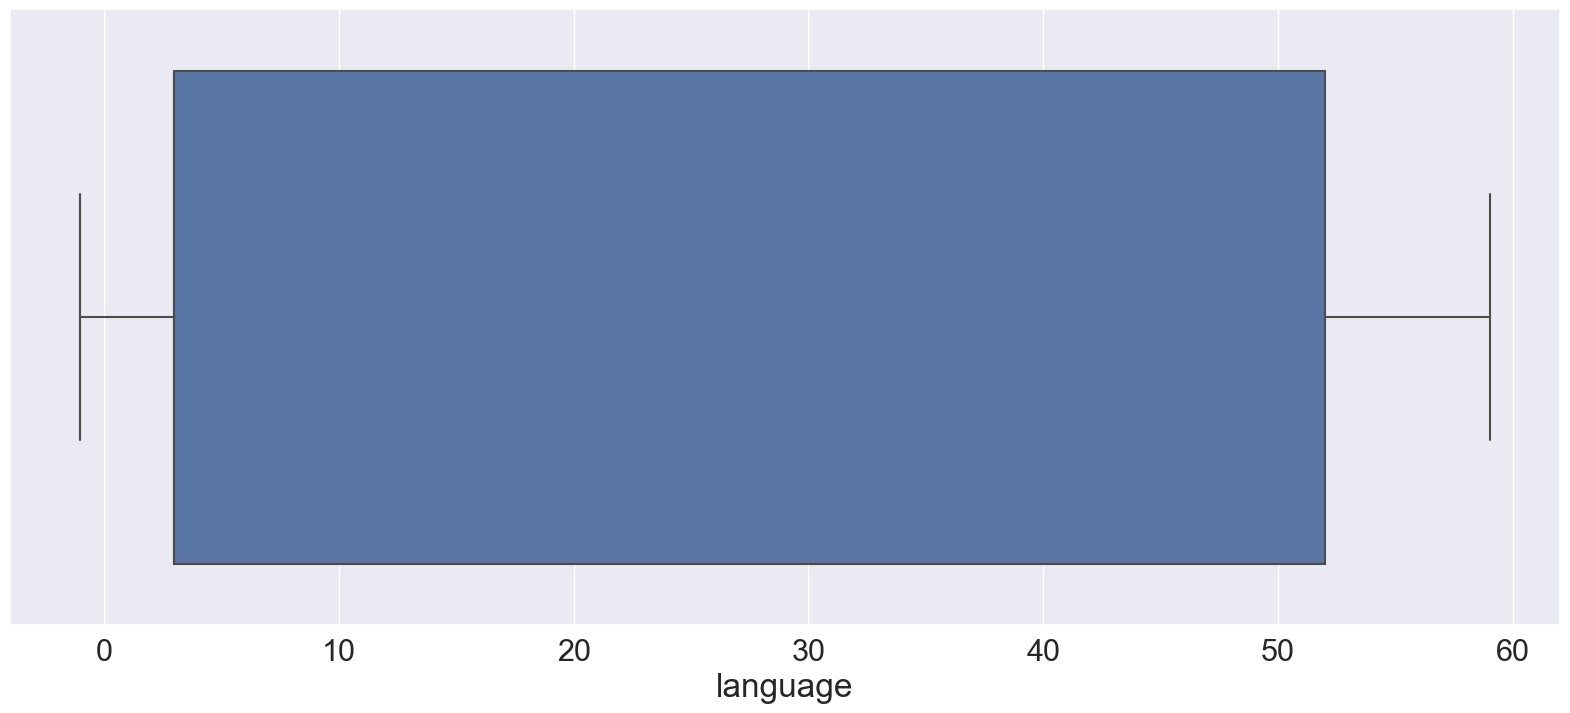

In [53]:
fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x=train_full_merged_set.language)
plt.show()
# we see that language is skewed symmetrical, we can use mean to replace null values

In [54]:
# find counts of null values before preparation
train_full_merged_set.isna().sum()

msno                            0
song_id                         0
source_system_tab           24849
source_screen_name         414804
source_type                 21539
target                          0
city                            0
bd                              0
gender                    2961479
registered_via                  0
registration_init_time          0
expiration_date                 0
song_length                  1569
genre_ids                  119906
artist_name                  1569
composer                  1676694
lyricist                  3179542
language                     1605
name                         1571
isrc                       577963
dtype: int64

In [55]:
test_full_merged_set.isna().sum()

id                              0
msno                            0
song_id                         0
source_system_tab            8442
source_screen_name         162883
source_type                  7297
city                            0
bd                              0
gender                    1052224
registered_via                  0
registration_init_time          0
expiration_date                 0
song_length                   796
genre_ids                   42866
artist_name                   796
composer                   619756
lyricist                  1225042
language                      813
name                          803
isrc                       196665
dtype: int64

In [56]:
# first we'll handle the age, 47 is in the 98th percentile
# helper function to normalize the age, less than 0 and greater than 100
def filter_age(x_age):
  # 98th percentile is 47
  if x_age >= 0 and x_age <= 100:
    return x_age
  else:
    return 47

In [57]:
train_full_merged_set['bd'] = train_full_merged_set['bd'].apply(filter_age)
test_full_merged_set['bd'] = train_full_merged_set['bd'].apply(filter_age)

In [58]:
# extract the date features from the full merged data
# helper function to extract day, month, year, and time from the date fields
def extract_date_features(x_data):
  # convert into date format
  x_data['expiration_date'] = pd.to_datetime(x_data['expiration_date'], format='%Y%m%d')
  x_data['registration_init_time'] = pd.to_datetime(x_data['registration_init_time'], format='%Y%m%d')
  
  # get membership period from registration and expiration dates
  x_data['membership_days'] = x_data['expiration_date'].subtract(x_data['registration_init_time']).dt.days.astype(int)
    
  # extract year, month and day from dates
  x_data['registration_year'] = x_data['registration_init_time'].dt.year
  x_data['registration_month'] = x_data['registration_init_time'].dt.month
  x_data['registration_day'] = x_data['registration_init_time'].dt.day

  x_data['expiration_year'] = x_data['expiration_date'].dt.year
  x_data['expiration_month'] = x_data['expiration_date'].dt.month
  x_data['expiration_day'] = x_data['expiration_date'].dt.day

  return x_data

In [59]:
train_full_merged_set = extract_date_features(train_full_merged_set)
test_full_merged_set = extract_date_features(test_full_merged_set)

In [60]:
train_full_merged_set.tail()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,...,language,name,isrc,membership_days,registration_year,registration_month,registration_day,expiration_year,expiration_month,expiration_day
7377413,6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=,VJTxizih/o28kXCbtPbIyWXScoXGvxyYtl6R+0YB5JM=,my library,Local playlist more,local-playlist,1,4,26,female,9,...,52.0,Still D.R.E.,USIR19905031,4669,2004,12,18,2017,9,30
7377414,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,search,Search,song,0,1,0,NaN,7,...,52.0,Locked Away,USRC11501369,1562,2013,6,27,2017,10,6
7377415,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,search,Search,song,1,1,0,NaN,7,...,3.0,FLY OUT,TWA451512031,1562,2013,6,27,2017,10,6
7377416,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,G8wgqObgeAMER/rVCIlgcNeQ8mm0CzF/GsxiMK8TTnA=,discover,Discover Genre,online-playlist,1,5,0,NaN,9,...,52.0,Wonderwall,USNO10750721,948,2015,2,13,2017,9,18
7377417,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,Ju0VGkjWeBUZCd7r5Az2hUImhMoWxWLUicOedsmvG0g=,discover,Discover Genre,online-playlist,1,5,0,NaN,9,...,52.0,Time after time,FR14F9900090,948,2015,2,13,2017,9,18


In [61]:
train_full_merged_set.isna().sum()

msno                            0
song_id                         0
source_system_tab           24849
source_screen_name         414804
source_type                 21539
target                          0
city                            0
bd                              0
gender                    2961479
registered_via                  0
registration_init_time          0
expiration_date                 0
song_length                  1569
genre_ids                  119906
artist_name                  1569
composer                  1676694
lyricist                  3179542
language                     1605
name                         1571
isrc                       577963
membership_days                 0
registration_year               0
registration_month              0
registration_day                0
expiration_year                 0
expiration_month                0
expiration_day                  0
dtype: int64

In [62]:
train_full_merged_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 27 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   msno                    object        
 1   song_id                 object        
 2   source_system_tab       object        
 3   source_screen_name      object        
 4   source_type             object        
 5   target                  int64         
 6   city                    int64         
 7   bd                      int64         
 8   gender                  object        
 9   registered_via          int64         
 10  registration_init_time  datetime64[ns]
 11  expiration_date         datetime64[ns]
 12  song_length             float64       
 13  genre_ids               object        
 14  artist_name             object        
 15  composer                object        
 16  lyricist                object        
 17  language                float64       
 18  na

In [63]:
# fill the remainder of the missing/null values with this helper function
def fill_missing_values(x_data):
    x_data['source_system_tab'].fillna('unknown_system_tab', inplace=True)
    x_data['source_screen_name'].fillna('unknown_screen_name', inplace=True)
    x_data['source_type'].fillna('unknown_source_type', inplace=True)
    x_data['bd'].fillna(47, inplace=True)
    x_data['gender'].fillna('missing_gender', inplace=True)
    x_data['song_length'].fillna(value = x_data['song_length'].median(), inplace=True)
    x_data['genre_ids'].fillna(0, inplace=True)
    x_data['lyricist'].fillna('unknown_lyricist', inplace=True)
    x_data['artist_name'].fillna('unknown_artist_name', inplace=True)
    x_data['composer'].fillna('unknown_composer', inplace=True)
    x_data['language'].fillna(value = x_data['language'].median(), inplace=True)
    x_data['name'].fillna('unknown_name', inplace=True)
    
    return x_data

In [64]:
train_full_merged_set = fill_missing_values(train_full_merged_set)
test_full_merged_set = fill_missing_values(test_full_merged_set)

In [65]:
train_full_merged_set.isna().sum()

msno                           0
song_id                        0
source_system_tab              0
source_screen_name             0
source_type                    0
target                         0
city                           0
bd                             0
gender                         0
registered_via                 0
registration_init_time         0
expiration_date                0
song_length                    0
genre_ids                      0
artist_name                    0
composer                       0
lyricist                       0
language                       0
name                           0
isrc                      577963
membership_days                0
registration_year              0
registration_month             0
registration_day               0
expiration_year                0
expiration_month               0
expiration_day                 0
dtype: int64

In [66]:
test_full_merged_set.isna().sum()

id                             0
msno                           0
song_id                        0
source_system_tab              0
source_screen_name             0
source_type                    0
city                           0
bd                             0
gender                         0
registered_via                 0
registration_init_time         0
expiration_date                0
song_length                    0
genre_ids                      0
artist_name                    0
composer                       0
lyricist                       0
language                       0
name                           0
isrc                      196665
membership_days                0
registration_year              0
registration_month             0
registration_day               0
expiration_year                0
expiration_month               0
expiration_day                 0
dtype: int64

In [67]:
train_full_merged_set.head(20)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,...,language,name,isrc,membership_days,registration_year,registration_month,registration_day,expiration_year,expiration_month,expiration_day
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,0,missing_gender,7,...,52.0,Good Grief,GBUM71602854,2103,2012,1,2,2017,10,5
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,13,24,female,9,...,52.0,Lords of Cardboard,US3C69910183,2301,2011,5,25,2017,9,11
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,13,24,female,9,...,52.0,Hip Hop Is Dead(Album Version (Edited)),USUM70618761,2301,2011,5,25,2017,9,11
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,13,24,female,9,...,-1.0,Disco Africa,GBUQH1000063,2301,2011,5,25,2017,9,11
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,1,0,missing_gender,7,...,52.0,Sleep Without You,QM3E21606003,2103,2012,1,2,2017,10,5
5,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,explore,Explore,online-playlist,1,1,0,missing_gender,7,...,52.0,Panda,USUM71601094,2103,2012,1,2,2017,10,5
6,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,my library,Local playlist more,local-playlist,1,13,24,female,9,...,31.0,眼| 鼻| 口 (Eyes| Nose| Lips),TWA531400512,2301,2011,5,25,2017,9,11
7,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,explore,Explore,online-playlist,1,1,0,missing_gender,7,...,52.0,Star Of The Show,USLXJ1607334,2103,2012,1,2,2017,10,5
8,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,/bU6IRSK+YNlNbaTkxo7bhsb2EDLPrnksdX3ggcZNhI=,my library,Local playlist more,local-library,1,15,26,male,9,...,52.0,Dreaming Out Loud,USUM70759544,2309,2011,11,7,2018,3,4
9,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,EbI7xoNxI+3QSsiHxL13zBdgHIJOwa3srHd7cDcnJ0g=,my library,Local playlist more,local-library,1,15,26,male,9,...,52.0,Counting Stars,USUM71301306,2309,2011,11,7,2018,3,4


In [68]:
# we need to do some feature engineering for the genres, some genres have more than 1 seperated by a '|'
# we can begin extracting the genre ids and the total genre count
train_full_merged_set.genre_ids.unique()

array(['359', '1259', '1019', '1011', '465', '2022', '458', '465|458', 0,
       '1609', '423', '921', '451', '437', '465|1259', '444', '921|458',
       '958', '829', '921|465', '691', '940|388', '880|458', '1616|1609',
       '1616', '139|125|109', '465|430', '1152|829', '139', '947', '2157',
       '940', '726', '786|726', '2122', '458|1287', '786|947', '465|1011',
       '864|850|726|857|843', '786', '786|2122', '242|726', '726|242',
       '352|1995', '444|1259', '698', '465|921', '893', '465|139',
       '2122|947|958', '958|786', '388', '2176|2093', '1152', '430',
       '465|2122', '1155', '1616|2058', '242', '2116|1616', '1180',
       '864|857|850|843', '465|2022', '1609|465', '873',
       '864|786|850|857|843', '1609|458', '864|850|857|921|843', '900',
       '2189|367', '798', '1572|275', '1609|282', '444|1609', '829|786',
       '2086', '545', '437|850', '465|798', '465|958', '864|843', '2079',
       '1605', '465|691', '880', '1955', '1609|2107', '184|2122', '409',
     

In [69]:
# helper function to seperate genre ids and provide the total count
def parse_genre_ids(x_data):
    # generate a matrix of zeros to house the seperated ids and total count
    genre_ids_matrix = np.zeros((x_data.shape[0], 4))

    for i in range(x_data.shape[0]):
      ids = str(x_data['genre_ids'].values[i]).split('|')
      if len(ids) > 2:
          genre_ids_matrix[i, 0] = (ids[0])
          genre_ids_matrix[i, 1] = (ids[1])
          genre_ids_matrix[i, 2] = (ids[2])
      elif len(ids) > 1:
          genre_ids_matrix[i, 0] = (ids[0])
          genre_ids_matrix[i, 1] = (ids[1])
      elif len(ids) == 1:
          genre_ids_matrix[i, 0] = (ids[0])
      genre_ids_matrix[i, 3] = len(ids)

    x_data['first_genre_id'] = genre_ids_matrix[:, 0] # holds the first genre_id
    x_data['second_genre_id'] = genre_ids_matrix[:, 1] # holds second genre_id
    x_data['third_genre_id'] = genre_ids_matrix[:, 2] # holds third genre_id
    x_data['genre_ids_count'] = genre_ids_matrix[:, 3] # holds count of genre_ids
  
    return x_data

In [70]:
train_full_merged_set = parse_genre_ids(train_full_merged_set)
test_full_merged_set = parse_genre_ids(test_full_merged_set)

In [71]:
# we will drop 'lyricist' and 'composer' since there was no correlation and feature importance with the target
train_full_merged_set = train_full_merged_set.drop(['lyricist', 'composer'], axis=1)
test_full_merged_set = test_full_merged_set.drop(['lyricist', 'composer'], axis=1)

In [72]:
train_full_merged_set.isna().sum()

msno                           0
song_id                        0
source_system_tab              0
source_screen_name             0
source_type                    0
target                         0
city                           0
bd                             0
gender                         0
registered_via                 0
registration_init_time         0
expiration_date                0
song_length                    0
genre_ids                      0
artist_name                    0
language                       0
name                           0
isrc                      577963
membership_days                0
registration_year              0
registration_month             0
registration_day               0
expiration_year                0
expiration_month               0
expiration_day                 0
first_genre_id                 0
second_genre_id                0
third_genre_id                 0
genre_ids_count                0
dtype: int64

In [73]:
test_full_merged_set.isna().sum()

id                             0
msno                           0
song_id                        0
source_system_tab              0
source_screen_name             0
source_type                    0
city                           0
bd                             0
gender                         0
registered_via                 0
registration_init_time         0
expiration_date                0
song_length                    0
genre_ids                      0
artist_name                    0
language                       0
name                           0
isrc                      196665
membership_days                0
registration_year              0
registration_month             0
registration_day               0
expiration_year                0
expiration_month               0
expiration_day                 0
first_genre_id                 0
second_genre_id                0
third_genre_id                 0
genre_ids_count                0
dtype: int64

In [74]:
# feature engineering for ISRC feature and extract features
# helper function to extract the song year form the ISRC
def isrc_to_year(isrc):
    if type(isrc) == str:
        if int(isrc[5:7]) > 17:
            return 1900 + int(isrc[5:7])
        else:
            return 2000 + int(isrc[5:7])
    else:
        return np.nan

In [75]:
train_full_merged_set['song_year'] = train_full_merged_set['isrc'].apply(isrc_to_year)
test_full_merged_set['song_year'] = test_full_merged_set['isrc'].apply(isrc_to_year)

In [76]:
# helper function to extract features from the ISRC feature
def extract_isrc_features(x_data):
  isrc = x_data['isrc']
  x_data['country_code'] = isrc.str.slice(0, 2)
  x_data['registration_code'] = isrc.str.slice(2, 5)
  x_data['song_year'] = isrc.str.slice(5, 7).astype(float)
  x_data['song_year'] = x_data['song_year'].apply(lambda x: 2000+x if x < 18 else 1900+x)
  x_data['isrc_missing'] = (x_data['country_code'] == 0) * 1.0
    
  return x_data

In [77]:
train_full_merged_set = extract_isrc_features(train_full_merged_set)
test_full_merged_set = extract_isrc_features(test_full_merged_set)

In [78]:
# helper function to fill missing isrc values
def fill_null_isrc_values(x_data):
  x_data['isrc'].fillna('unknown_isrc', inplace=True)
  x_data['country_code'].fillna('unknown_country_code', inplace=True)
  x_data['registration_code'].fillna('unknown_registration_code', inplace=True)
  x_data['song_year'].fillna('unknown_song_year', inplace=True)
  
  return x_data

In [79]:
train_full_merged_set = fill_null_isrc_values(train_full_merged_set)
test_full_merged_set = fill_null_isrc_values(test_full_merged_set)

In [80]:
# extract features from the artist_name feature
# there are features that have multiple artist names, we will seperate them and get a count
# example: [Artist1 feat Artist2 and Artist3]
# we will add features is_featured, artist_count, and first_artist_name 

In [81]:
# helper function to extract each artist name and get the total artist count of each song
def extract_artist_count(x):
  return x.count('and') + x.count(',') + x.count(' feat') + x.count('&') + 1

def extract_first_artist(x):
  if x.count('and') > 0:
    x = x.split('and')[0]
  if x.count(',') > 0:
    x = x.split(',')[0]
  if x.count(' feat') > 0:
    x = x.split(' feat')[0]
  if x.count('&') > 0:
    x = x.split('&')[0]
    
  return x.strip()

# helper function for both above helper functions
def extract_artist_features(x_data):
  # get artist count 
  x_data['artist_count'] = x_data['artist_name'].apply(extract_artist_count).astype(np.int8)
  # get first artist name
  x_data['first_artist_name'] = x_data['artist_name'].apply(extract_first_artist)
  
  return x_data

In [82]:
train_full_merged_set = extract_artist_features(train_full_merged_set)
test_full_merged_set = extract_artist_features(test_full_merged_set)

In [83]:
# quick helper function to see if the artist name is featured, i.e. 'feat' is in the artist feature field
def extract_is_featured(x_data):
  x_data['is_featured'] = x_data['artist_name'].apply(lambda x: 1 if ' feat' in str(x) else 0).astype(np.int8)
  
  return x_data

In [84]:
train_full_merged_set = extract_is_featured(train_full_merged_set)
test_full_merged_set = extract_is_featured(test_full_merged_set)

In [85]:
#  drop the features that we've already extracted additional features from
train_full_merged_set = train_full_merged_set.drop(['genre_ids','artist_name','isrc','registration_init_time','expiration_date'],axis=1)
test_full_merged_set = test_full_merged_set.drop(['genre_ids','artist_name','isrc','registration_init_time','expiration_date'],axis=1)

In [86]:
# we calucate some song count features to have the repetitiveness of features per user
# some users have preferences over their favorite songs, genres, artists, language, etc.
# helper function to calculate group by features on dataframe
def calculate_groupby_features(x_data):
  # song count for each user
  member_song_count = x_data.groupby('msno').count()['song_id'].to_dict()
  x_data['member_song_count'] = x_data['msno'].apply(lambda x: member_song_count[x])

  # song count for each artist
  artist_song_count = x_data.groupby('first_artist_name').count()['song_id'].to_dict()
  x_data['artist_song_count'] = x_data['first_artist_name'].apply(lambda x: artist_song_count[x])

  # song count for each genre_id
  first_genre_id_song_count = x_data.groupby('first_genre_id').count()['song_id'].to_dict()
  x_data['genre_song_count'] = x_data['first_genre_id'].apply(lambda x: first_genre_id_song_count[x])

  # song count for each lanugage
  lang_song_count = x_data.groupby('language').count()['song_id'].to_dict()
  x_data['lang_song_count'] = x_data['language'].apply(lambda x: lang_song_count[x])

  # user count for each song
  song_member_count = x_data.groupby('song_id').count()['msno'].to_dict()
  x_data['song_member_count'] = x_data['song_id'].apply(lambda x: song_member_count[x])

  # We can add group by  wrt 'age'
  age_song_count = x_data.groupby('bd').count()['song_id'].to_dict()
  x_data['age_song_count'] =x_data['bd'].apply(lambda x: age_song_count[x])
 
  return x_data

In [87]:
train_full_merged_set = calculate_groupby_features(train_full_merged_set)
test_full_merged_set = calculate_groupby_features(test_full_merged_set)

In [89]:
# save the fully merged and feature engineered data sets for model training
train_full_merged_set.to_csv(data_path + '/train_full_merged_set.csv', index=False)
test_full_merged_set.to_csv(data_path + '/test_full_merged_set.csv', index=False)